In [1]:
#importing basic libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import modelling libraries
import scipy.stats as stats
from  sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Importing Data and Data Cleaning 


In [3]:
#import the data
data = pd.read_excel('E:/Predictive Projects Final/1. Predicting Credit Card Spend & Identifying Key Drivers/Data Set.xlsx', sheet_name = 'customer_dbase')

In [4]:
#CustId put no value to our model hence removing the column.
data = data.drop('custid',axis = 1)

In [5]:
#separating catagoraical columns
catag_var = ['region',
 'townsize',
 'gender',
 'agecat',
 'birthmonth',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'owngame',
 'ownfax',
 'news',
 'response_01',
 'response_02',
 'response_03']


In [6]:
#UDF for creating dummies from catagorical variables
def create_dummies(df, colname):
    
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [7]:
#Summaru for Continuous Variable
def cont_var_summ(x):
    return pd.Series([x.dtype,x.count(),x.nunique(),x.isnull().sum(),x.sum(),x.mean(),
                     x.median(),x.std(),x.var(),x.min(),x.quantile(0.01),x.quantile(0.05),
                     x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
                     x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],
           index = ['data_type','Count','Unique','missing_val','sum','mean','median',
                   'std','variance','mininum','P1','P5','P10','P25','P50','P75','P90','P95',
                   'P99','Max'])

In [8]:
#catagorical variable summary
def catag_var_summ(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.nunique(), x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)],
           index = ['unique', 'count', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [9]:
#missing value imputation
def miss_val_impute(x, method = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x


In [10]:
#missing value imputation for catagorical variable 

def miss_val_cat(x):
    x = x.fillna(x.mode())
    return x

In [11]:
#spliting the data into catagorical and continuos data
d_con_var = data.drop(catag_var, axis = 1)
d_cat_var = data[catag_var]

In [12]:
#Basic summary of Continuos data
d_con_var.apply(cont_var_summ).round(2).T

,data_type,Count,Unique,missing_val,sum,mean,median,std,variance,mininum,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
age,int64,5000,62,0,235128,47.0256,47,17.7703,315.785,18,18,20,23,31,47,62,72,76,79,79
ed,int64,5000,18,0,72715,14.543,14,3.28108,10.7655,6,8,9,10,12,14,17,19,20,21,23
income,int64,5000,266,0,273798,54.7596,38,55.3775,3066.67,9,9,13,16,24,38,67,109.1,147,272.01,1073
lninc,float64,5000,266,0,18499.5,3.69991,3.63759,0.747072,0.558116,2.19722,2.19722,2.56495,2.77259,3.17805,3.63759,4.20469,4.69226,4.99043,5.60584,6.97821
debtinc,float64,5000,325,0,49770.8,9.95416,8.8,6.39978,40.9572,0,0.7,1.9,2.8,5.1,8.8,13.6,18.6,22.2,29.2,43.1
creddebt,float64,5000,4950,0,9286.63,1.85733,0.926437,3.41573,11.6672,0,0.0331601,0.101088,0.175682,0.38552,0.926437,2.06382,4.29947,6.37301,14.2804,109.073
lncreddebt,float64,4999,4941,1,-652.137,-0.130454,-0.076106,1.27306,1.62068,-6.59733,-3.40169,-2.2916,-1.73784,-0.952685,-0.076106,0.724665,1.45863,1.8523,2.65891,4.69201
othdebt,float64,5000,4973,0,18272.3,3.65446,2.09854,5.39517,29.1079,0,0.114299,0.287692,0.457997,0.980301,2.09854,4.31478,8.06205,11.816,24.0643,141.459
lnothdebt,float64,4999,4972,1,3483.88,0.696915,0.741537,1.12858,1.27369,-4.09211,-2.16824,-1.24348,-0.780312,-0.0189865,0.741537,1.46205,2.08718,2.46959,3.1808,4.95201
spoused,int64,5000,22,0,30564,6.1128,-1,7.74352,59.9621,-1,-1,-1,-1,-1,-1,14,16,18,20,24


In [13]:
d_con_var.apply(cont_var_summ).round(2).T.to_csv("cont_var_sum.csv")

In [14]:
miss_percentage = data.isna().sum()/len(data)

In [15]:
miss_percentage.to_csv("miss.csv")

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [16]:
#outlier treatment for continuos variables
d_con_var = d_con_var.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))


In [17]:
#Missing value imputation
d_con_var = d_con_var.apply(miss_val_impute)

In [18]:
#final summary after outlier and missing value treatment
d_con_var.apply(cont_var_summ).round(1).T

,data_type,Count,Unique,missing_val,sum,mean,median,std,variance,mininum,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
age,int64,5000,62,0,235128,47.0256,47,17.7703,315.785,18,18,20,23,31,47,62,72,76,79,79
ed,int64,5000,14,0,72721,14.5442,14,3.24255,10.5141,8,8,9,10,12,14,17,19,20,21,21
income,float64,5000,223,0,268150,53.6299,38,46.5677,2168.55,9,9,13,16,24,38,67,109.1,147,272,272.01
lninc,float64,5000,223,0,18485.2,3.69705,3.63759,0.738495,0.545375,2.19722,2.19722,2.56495,2.77259,3.17805,3.63759,4.20469,4.69226,4.99043,5.6058,5.60584
debtinc,float64,5000,280,0,49570.6,9.91412,8.8,6.24169,38.9587,0.7,0.7,1.9,2.8,5.1,8.8,13.6,18.6,22.2,29.2,29.2
creddebt,float64,5000,4852,0,8791.84,1.75837,0.926437,2.38068,5.66764,0.0331601,0.0331659,0.101088,0.175682,0.38552,0.926437,2.06382,4.29947,6.37301,14.28,14.2804
lncreddebt,float64,5000,4843,0,-638.847,-0.127769,-0.076106,1.24127,1.54076,-3.40169,-3.4016,-2.29159,-1.7377,-0.952498,-0.076106,0.724559,1.45849,1.85207,2.65886,2.65891
othdebt,float64,5000,4875,0,17612.5,3.52251,2.09854,4.22176,17.8233,0.114299,0.114312,0.287692,0.457997,0.980301,2.09854,4.31478,8.06205,11.816,24.0625,24.0643
lnothdebt,float64,5000,4874,0,3491.97,0.698395,0.741537,1.10442,1.21974,-2.16824,-2.16823,-1.24336,-0.780244,-0.0185345,0.741537,1.46205,2.08717,2.46945,3.18065,3.1808
spoused,int64,5000,18,0,30477,6.0954,-1,7.70956,59.4374,-1,-1,-1,-1,-1,-1,14,16,18,20,20


In [19]:
d_cat_var.apply(catag_var_summ).round(2).T

,unique,count,NMISS,MODE,FREQ,PERCENT
region,5,5000,0,5,1027,20.54
townsize,5,4998,2,1,1436,28.73
gender,2,5000,0,1,2518,50.36
agecat,5,5000,0,4,1222,24.44
birthmonth,12,5000,0,September,458,9.16
...,...,...,...,...,...,...
ownfax,2,5000,0,0,4106,82.12
news,2,5000,0,0,2637,52.74
response_01,2,5000,0,0,4582,91.64
response_02,2,5000,0,0,4351,87.02


In [20]:
d_cat_var.apply(catag_var_summ).round(2).T.to_csv("cat_var.csv")

In [21]:
#catagorical value of missing value
d_cat_var= d_cat_var.apply(miss_val_cat)

In [22]:
d_cat_var['townsize'] = d_cat_var['townsize'].fillna(d_cat_var.townsize.median())

In [23]:
#as we need to find factor driving the spending we need to add both card spendings 
d_con_var['total_spend'] = d_con_var['cardspent'] + d_con_var['card2spent']


In [24]:
#droppping unneccesarry column
d_con_var = d_con_var.drop(['cardspent','card2spent'],axis =1)

In [25]:
#creating dummies
for cat_feature in d_cat_var:
    d_cat_var[cat_feature] = d_cat_var[cat_feature].astype('category')
    d_cat_var = create_dummies(d_cat_var,cat_feature)

In [26]:
#shape of catagorical variable
d_cat_var.shape

(5000, 356)

In [27]:
#for Data visualisation
def count_charts(x):
    sns.countplot(x)
    plt.show()

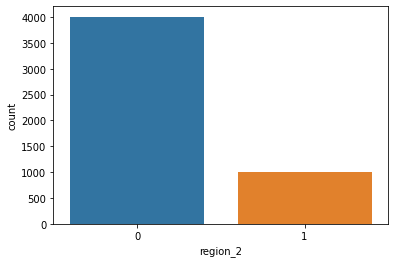

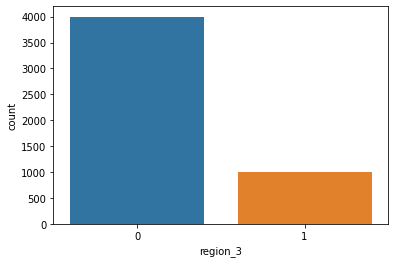

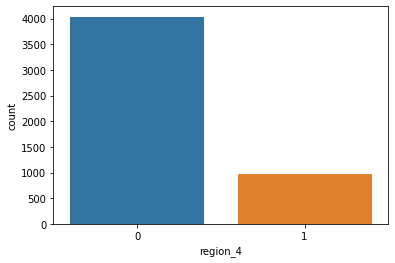

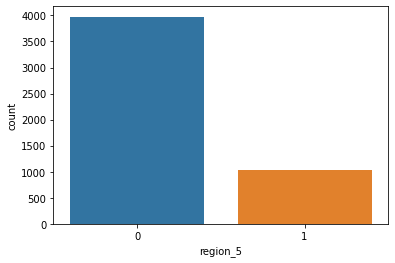

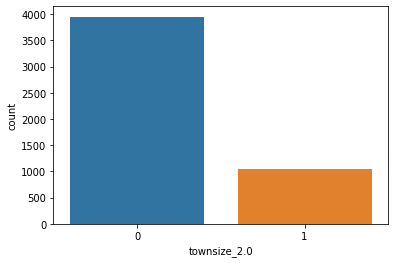

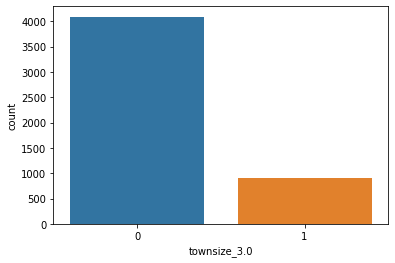

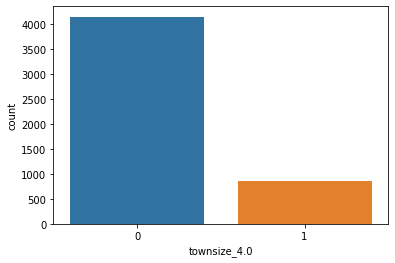

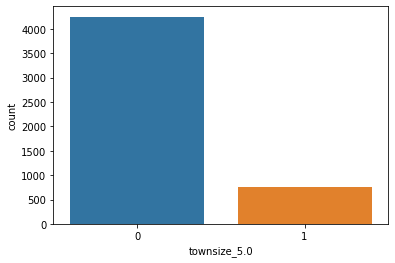

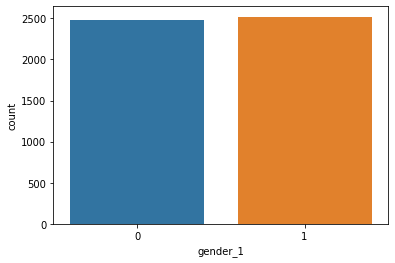

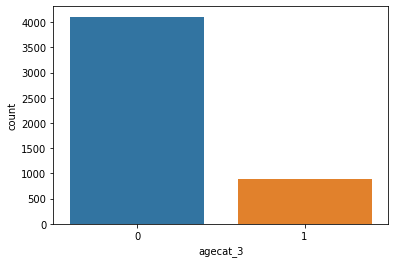

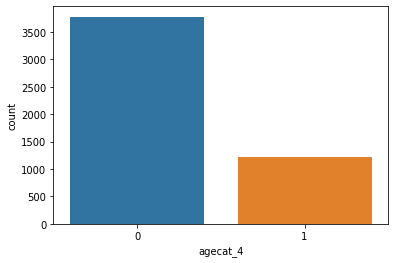

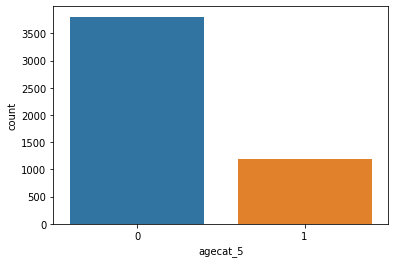

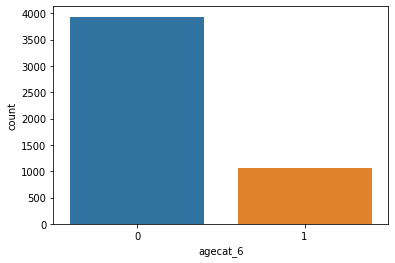

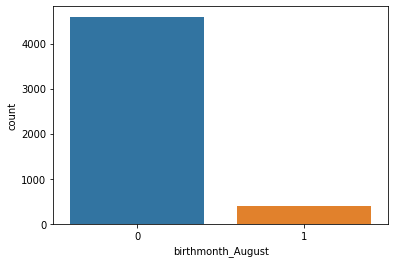

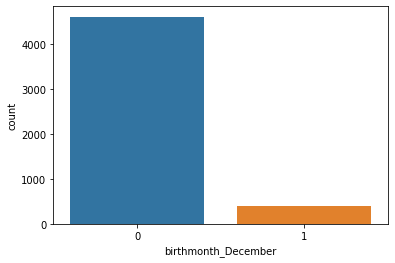

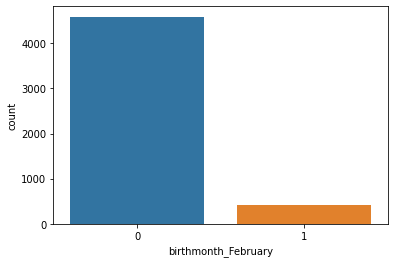

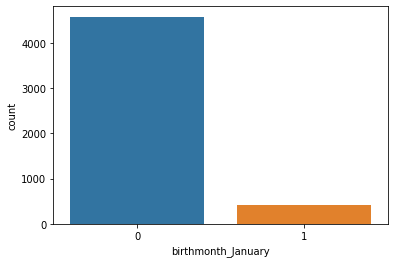

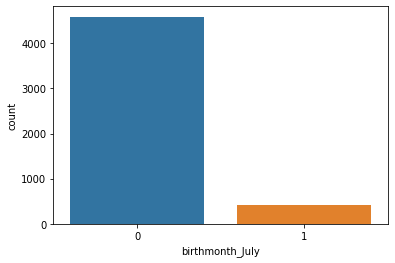

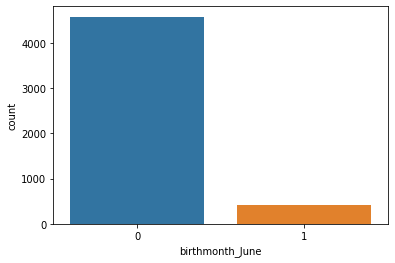

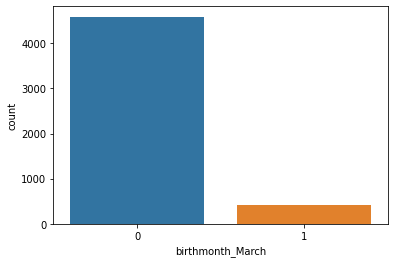

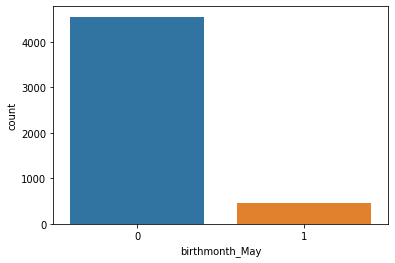

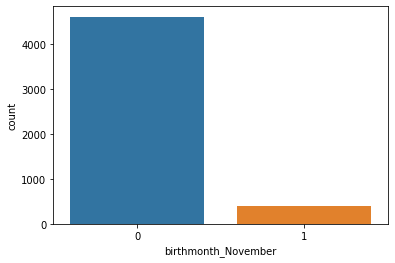

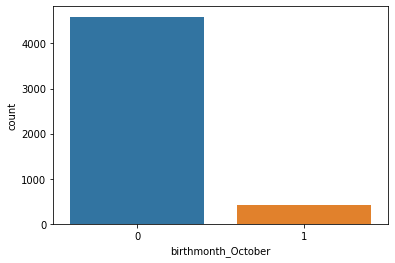

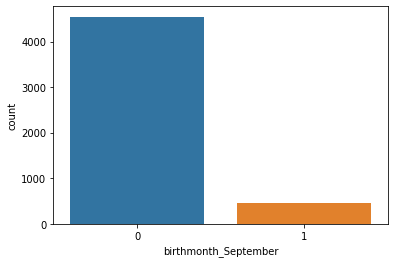

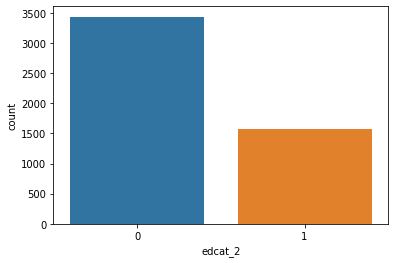

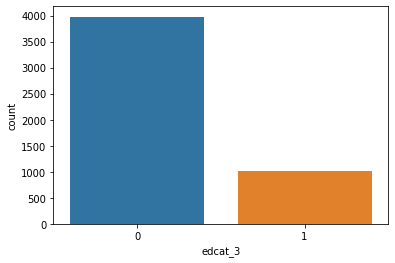

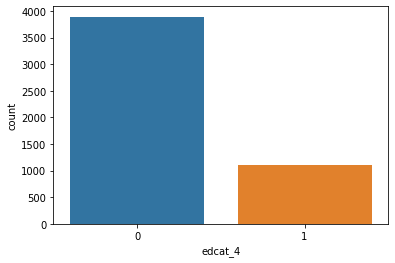

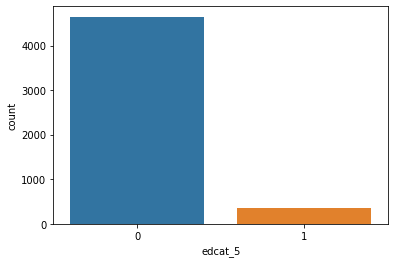

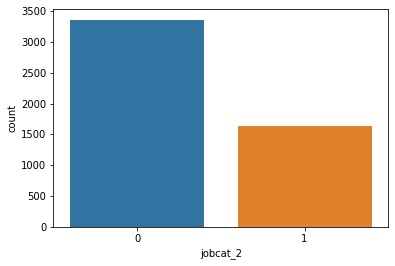

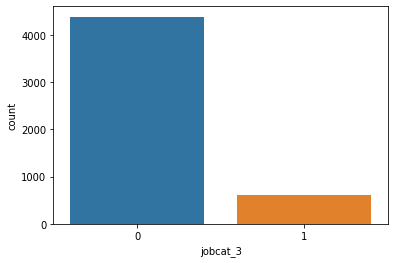

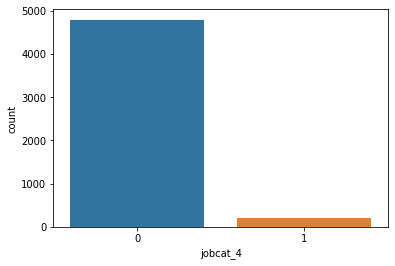

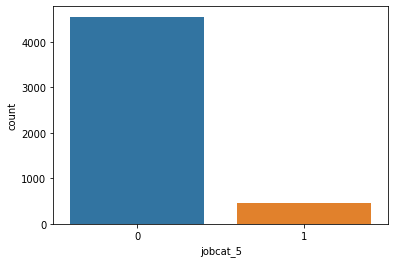

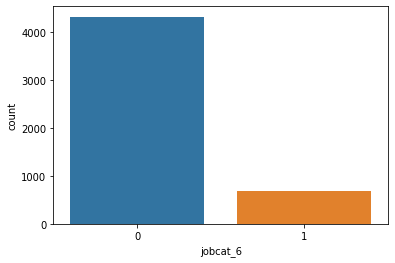

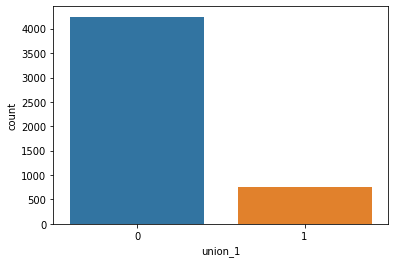

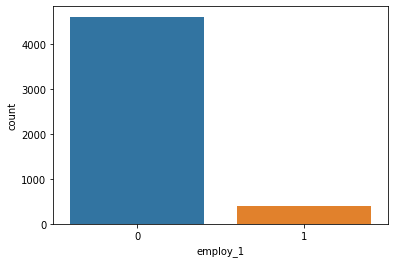

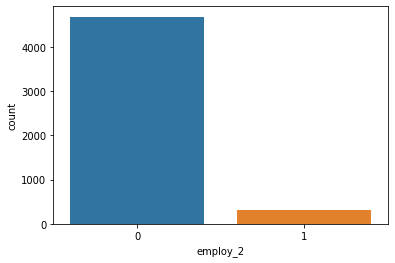

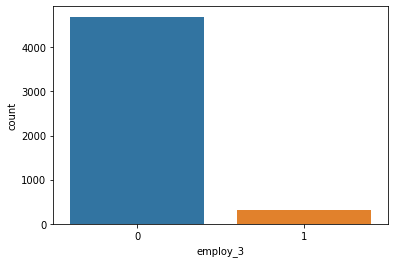

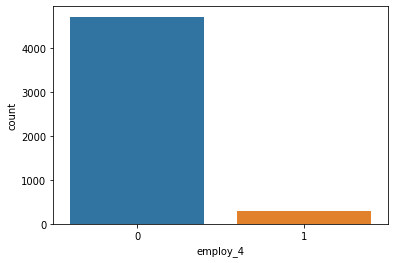

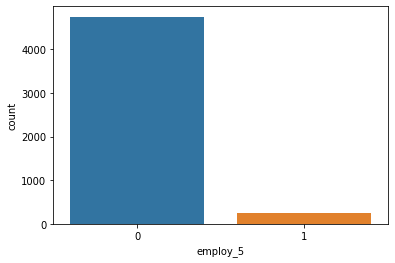

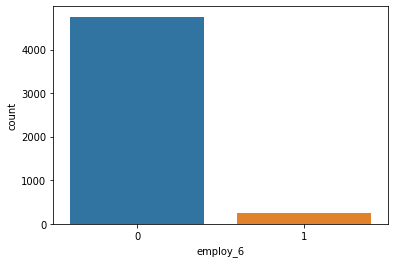

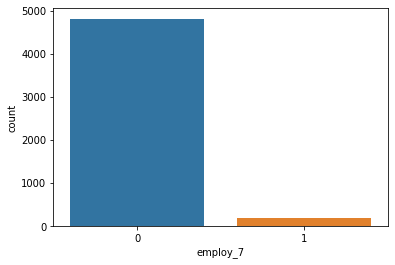

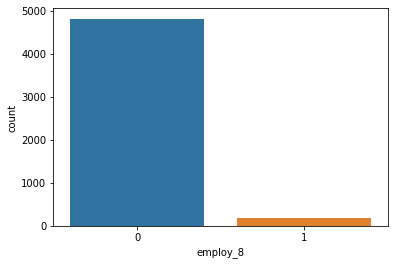

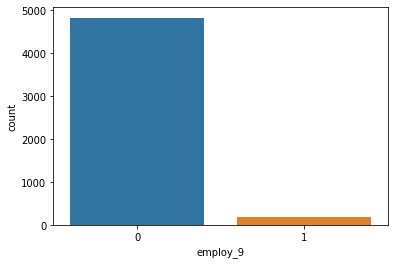

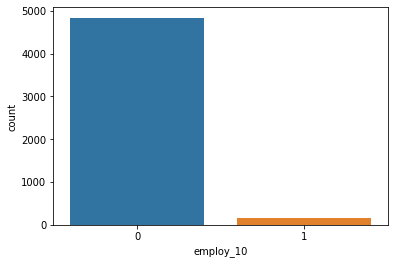

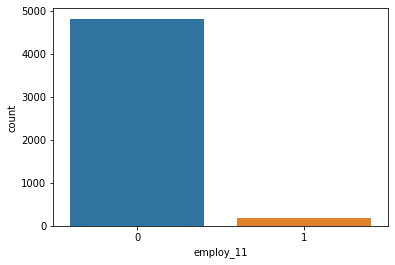

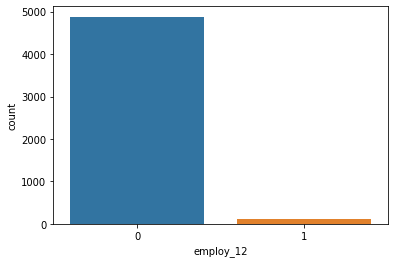

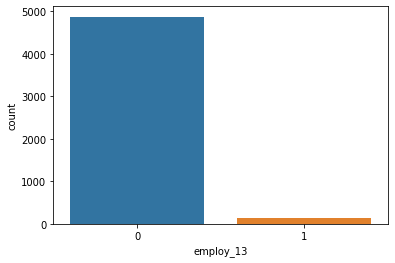

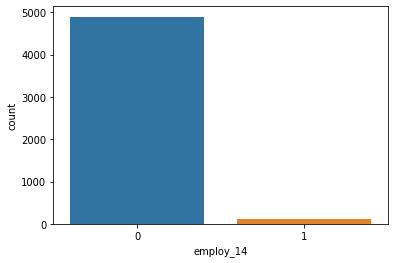

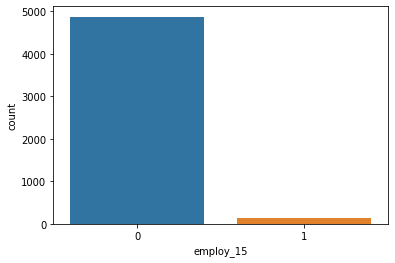

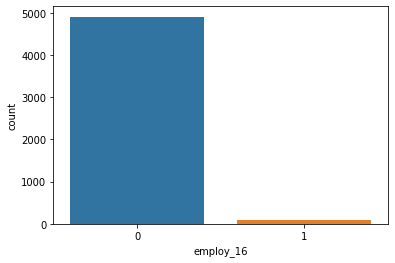

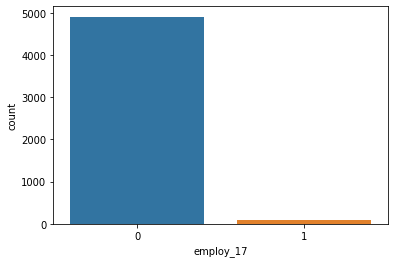

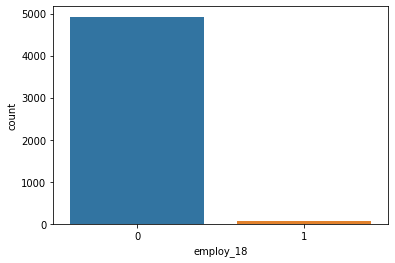

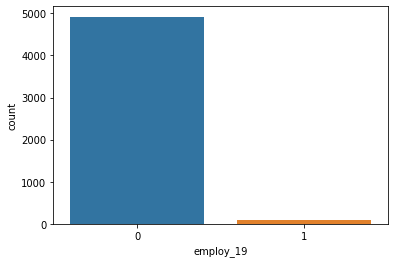

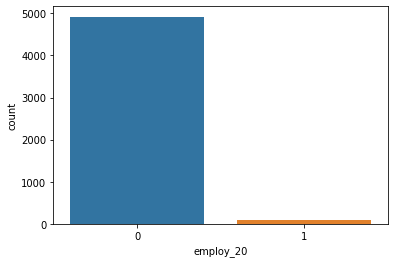

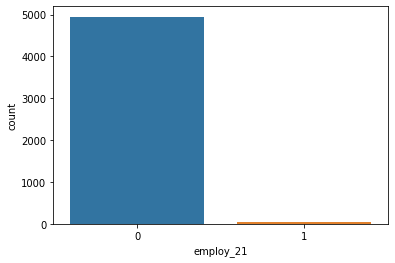

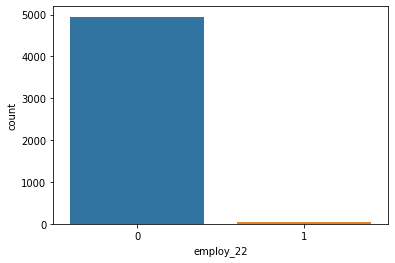

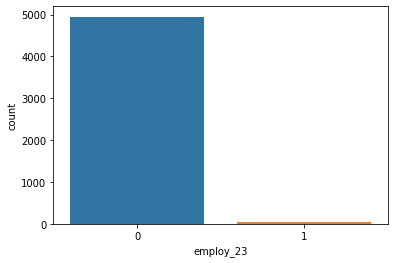

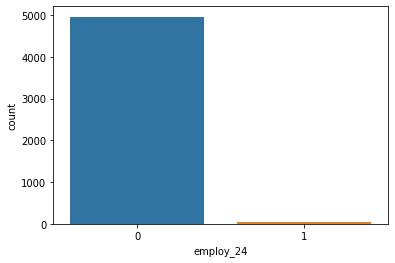

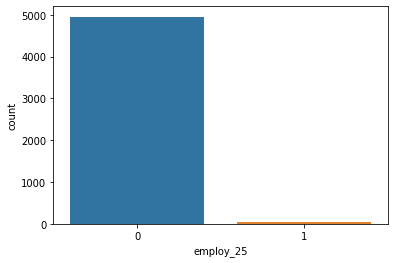

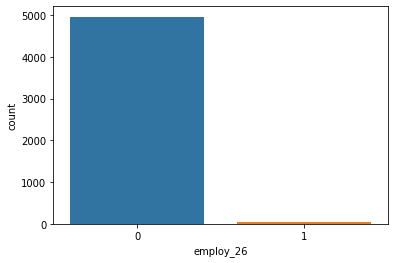

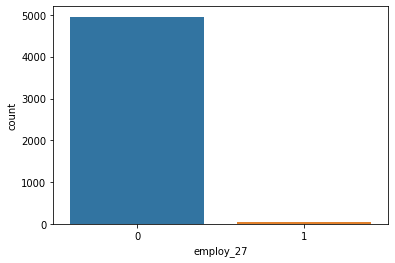

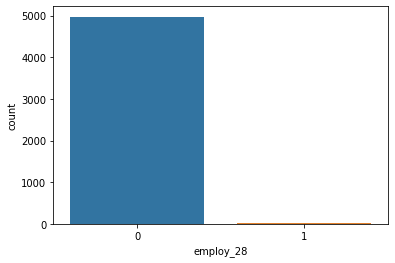

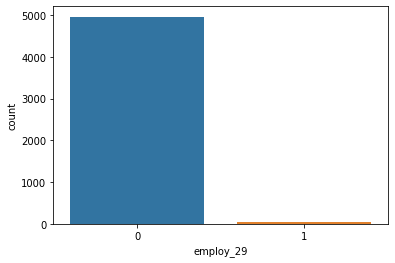

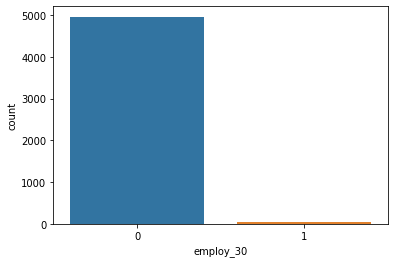

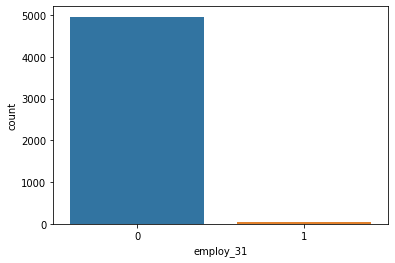

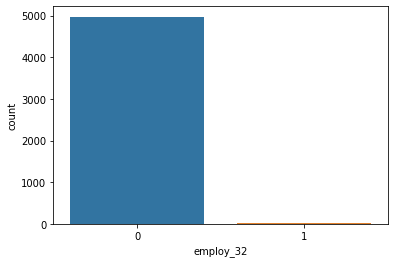

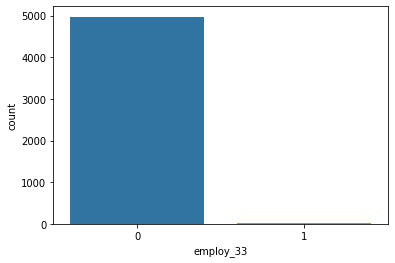

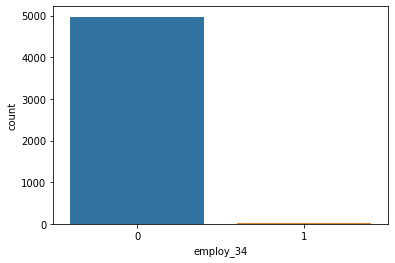

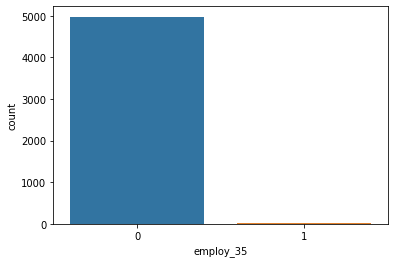

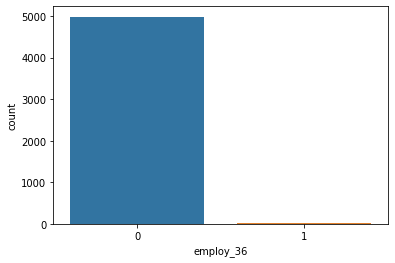

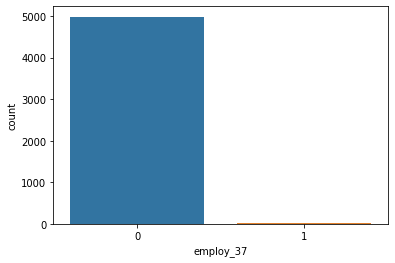

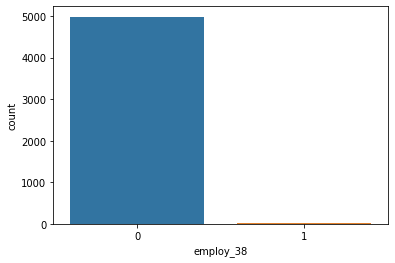

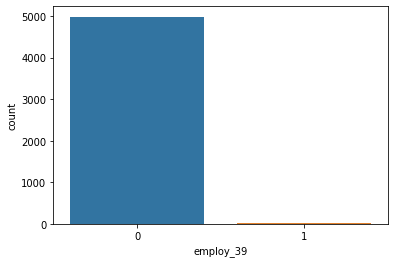

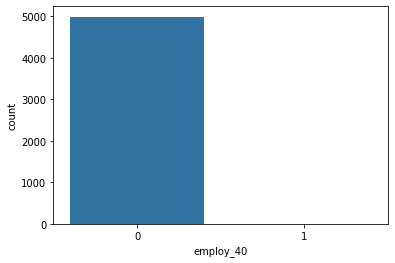

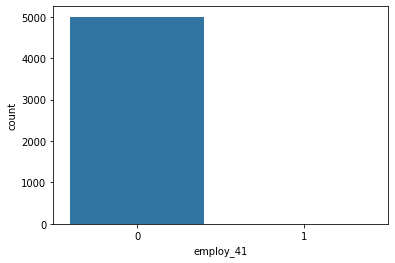

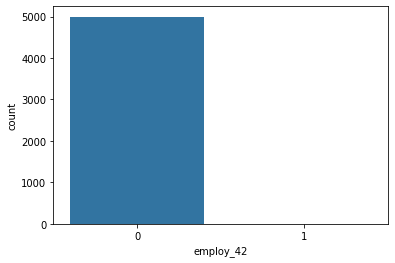

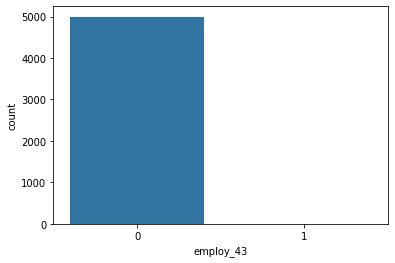

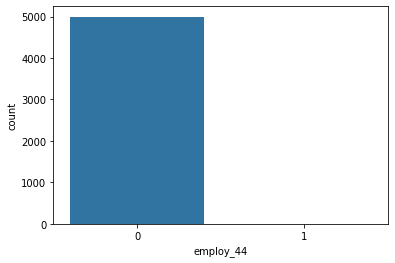

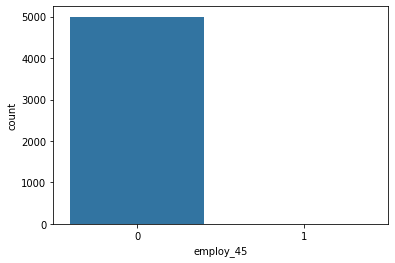

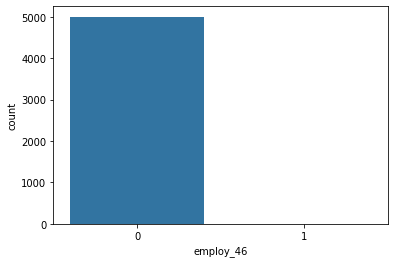

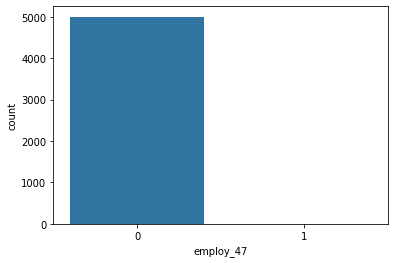

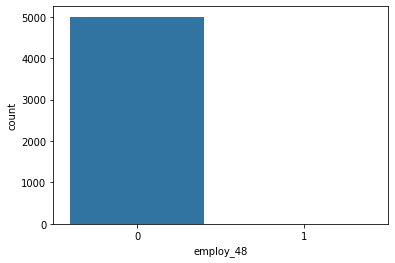

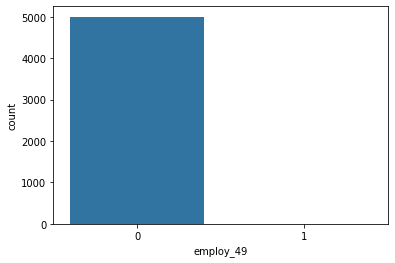

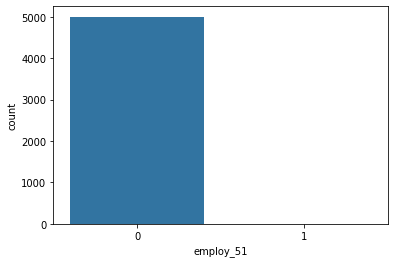

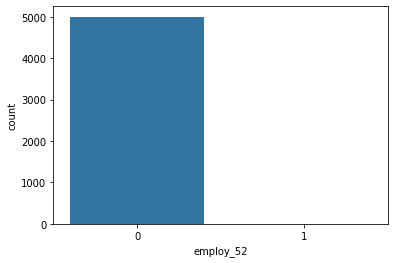

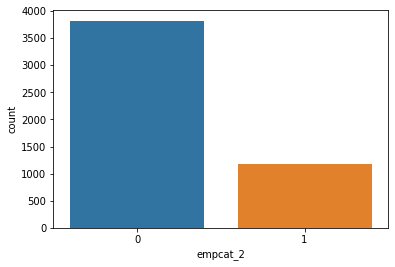

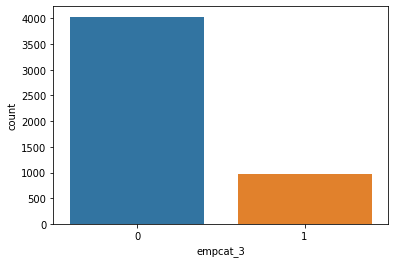

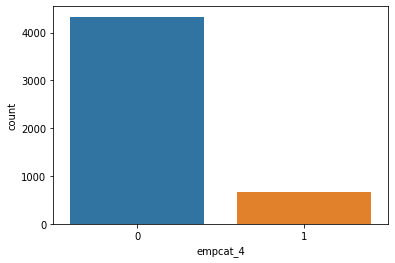

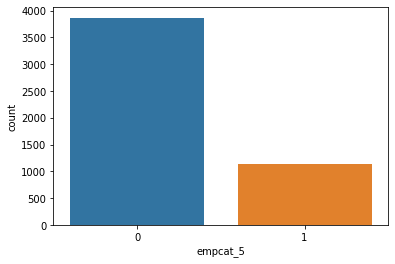

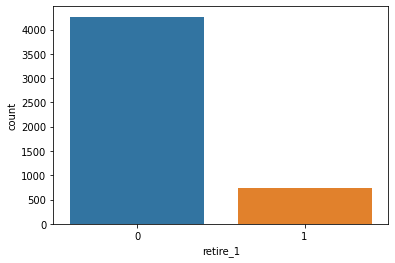

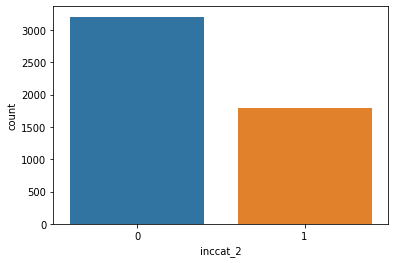

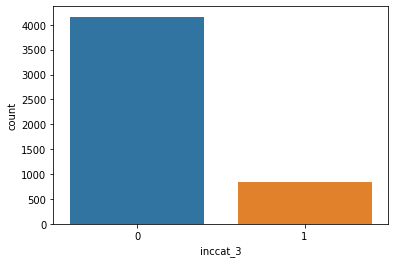

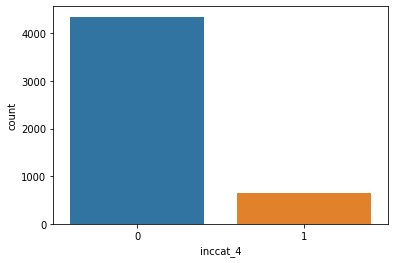

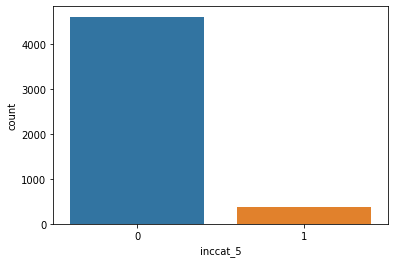

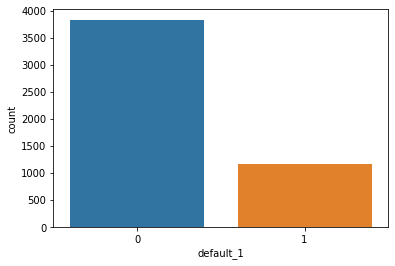

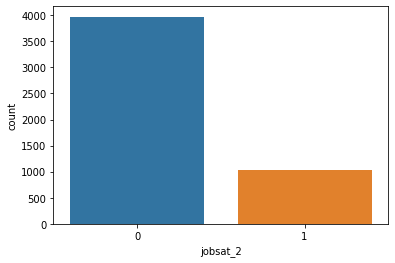

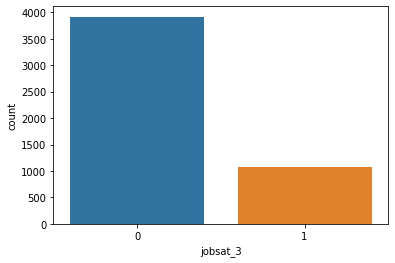

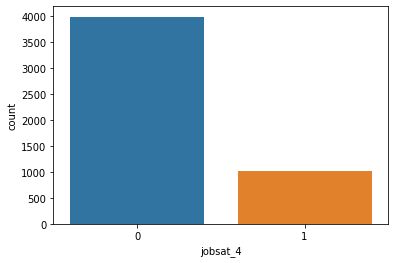

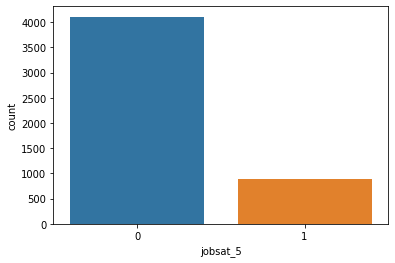

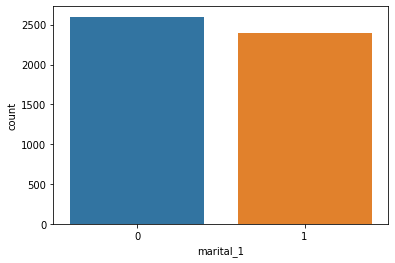

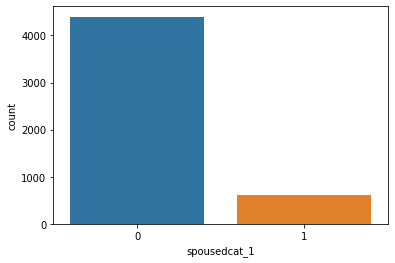

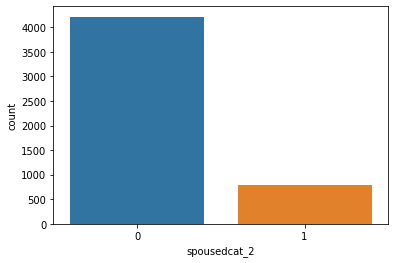

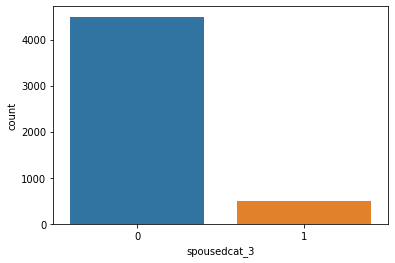

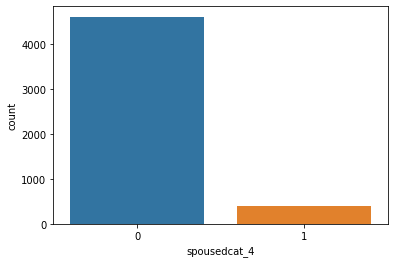

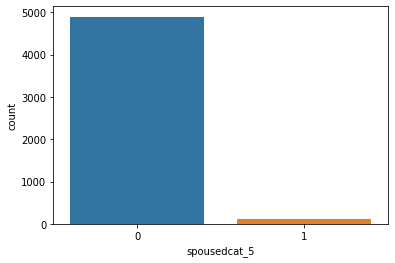

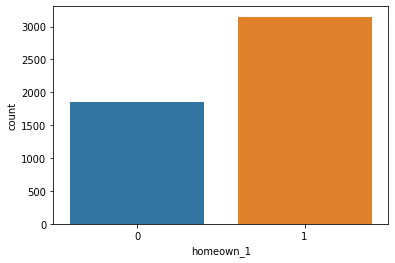

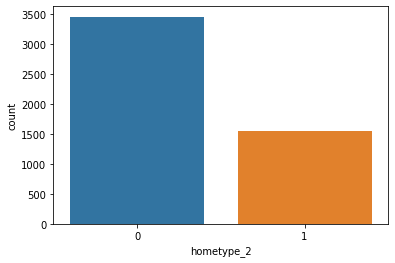

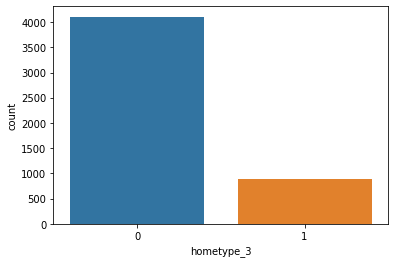

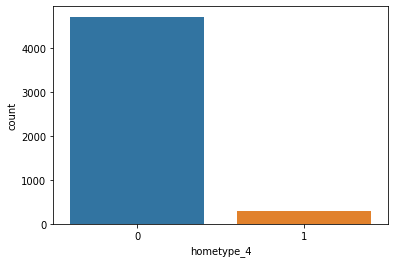

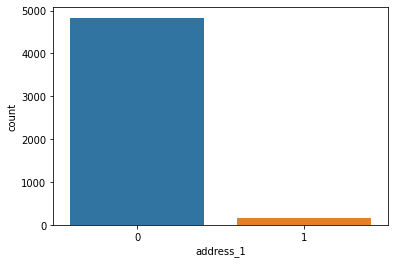

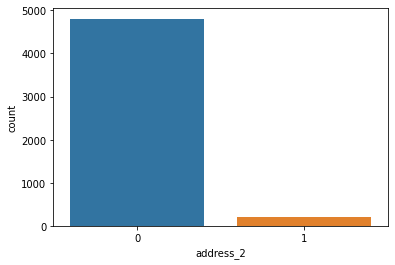

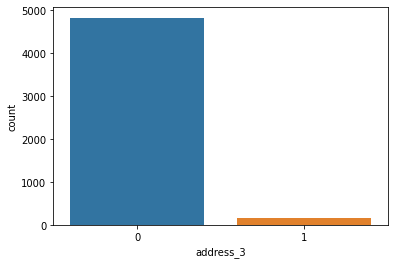

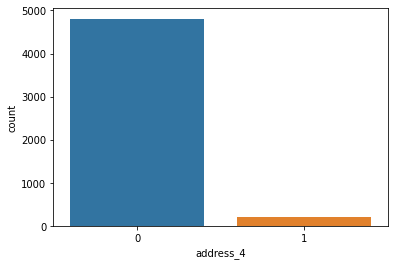

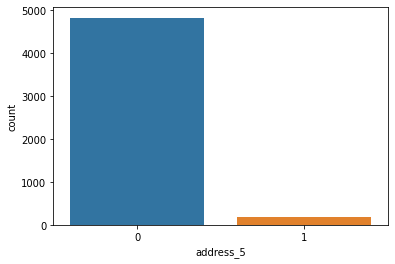

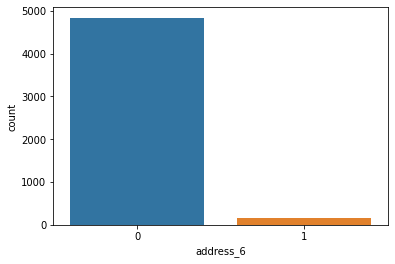

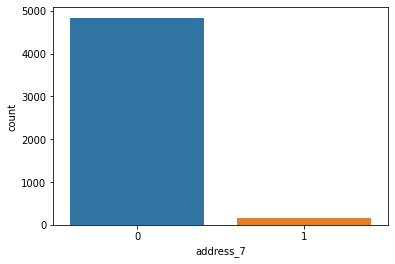

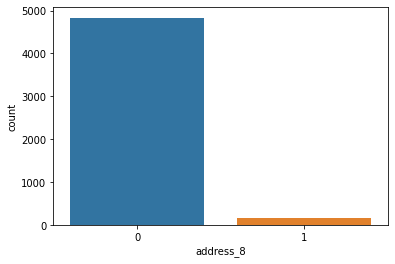

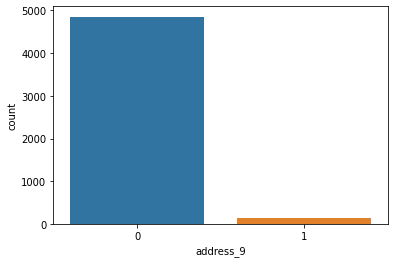

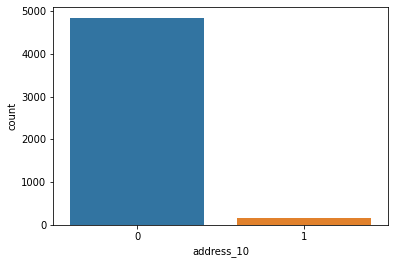

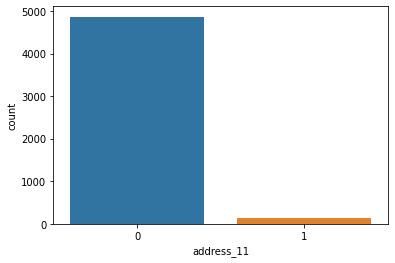

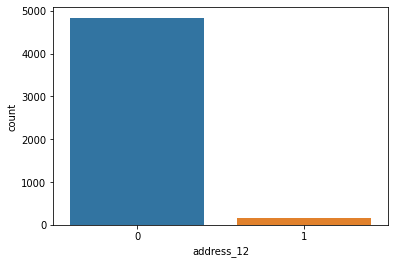

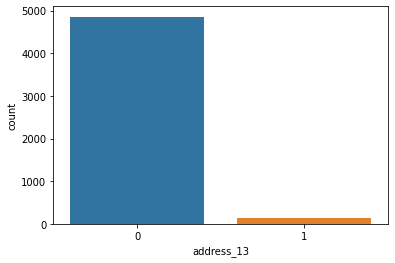

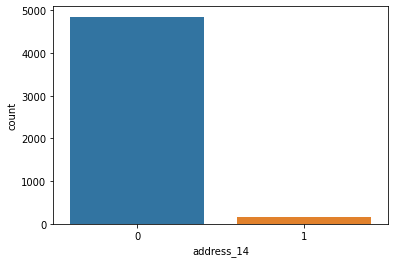

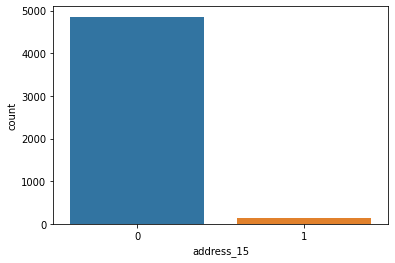

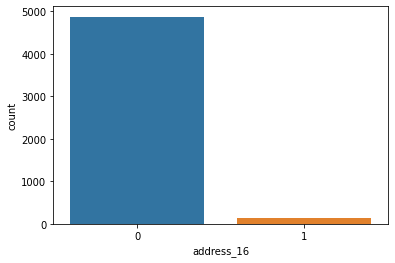

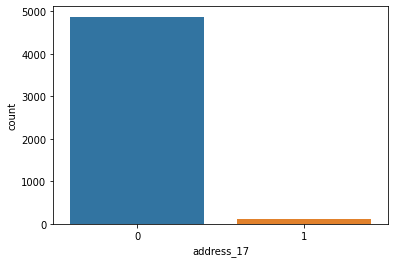

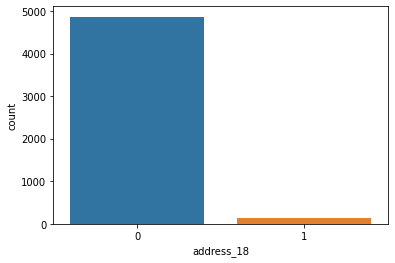

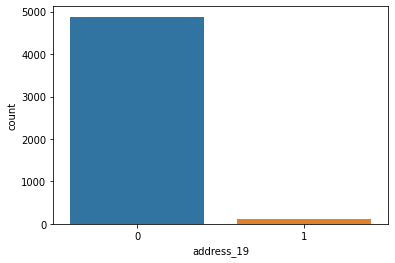

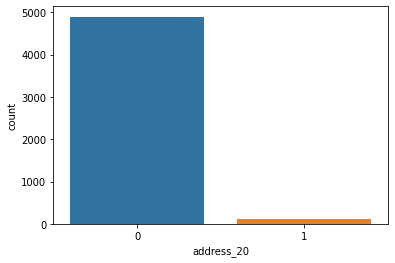

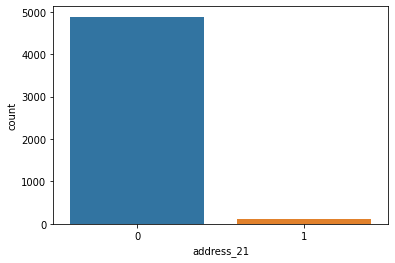

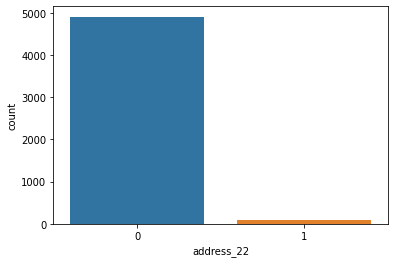

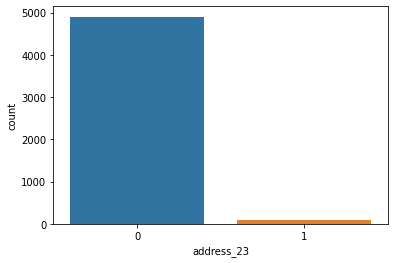

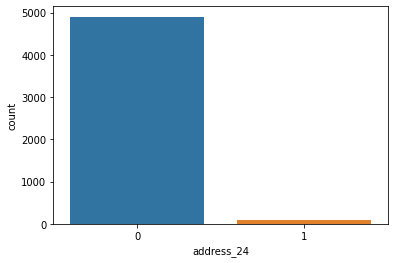

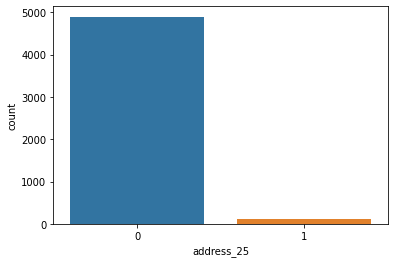

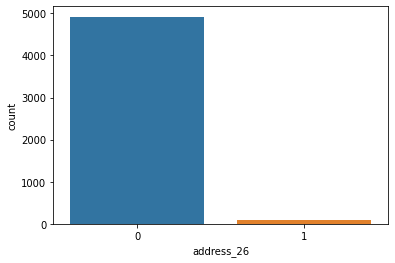

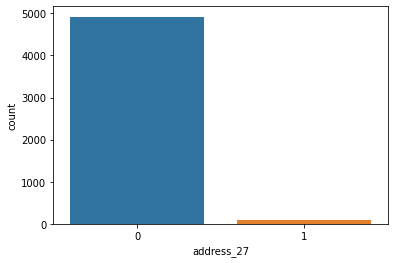

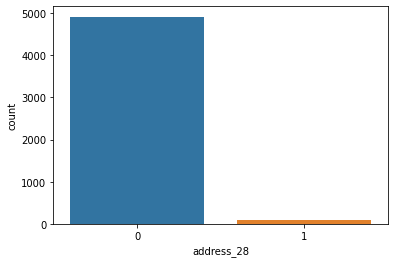

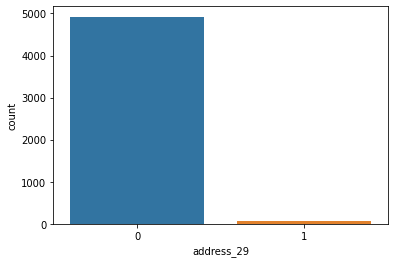

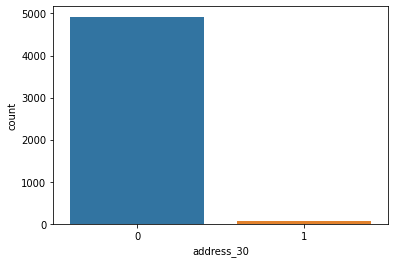

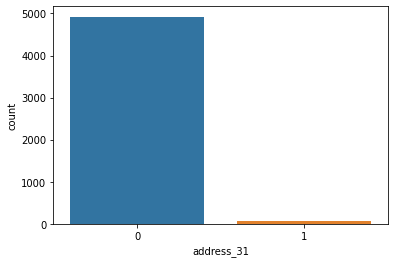

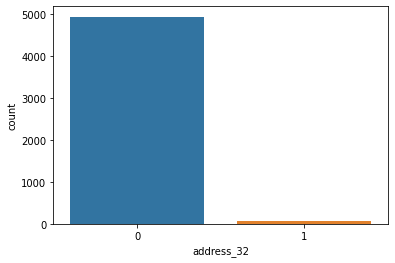

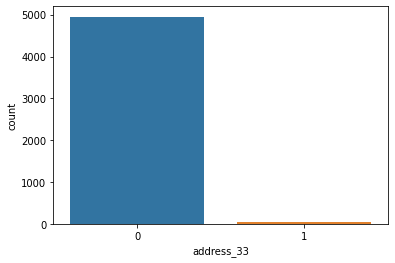

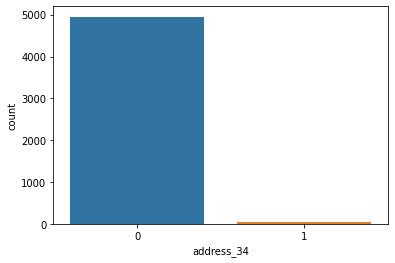

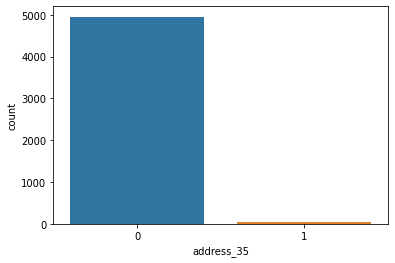

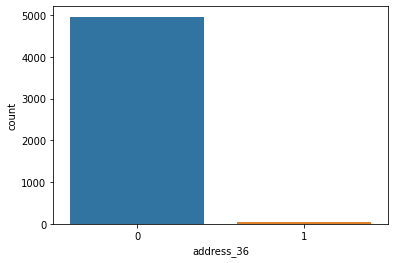

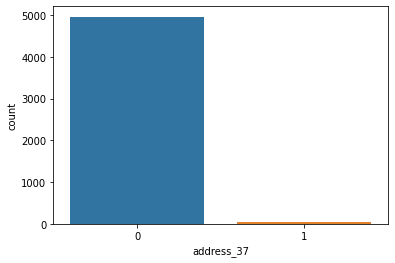

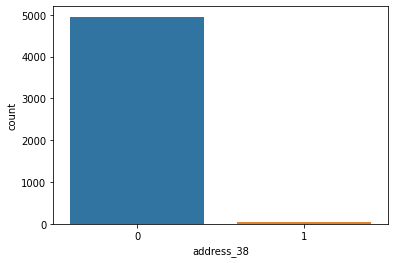

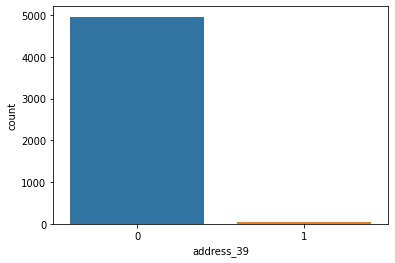

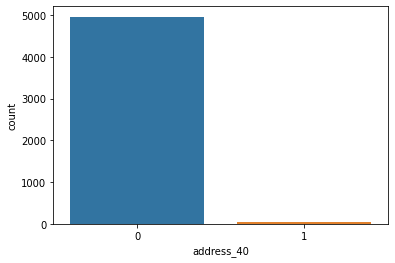

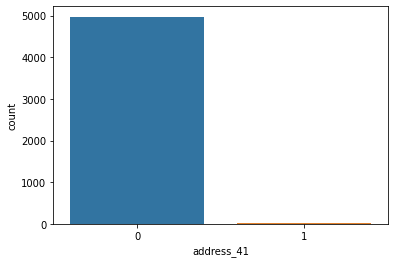

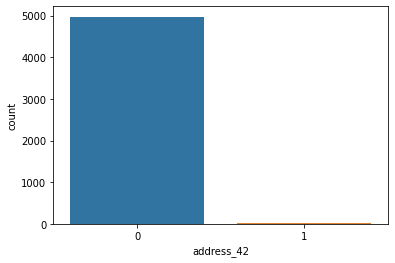

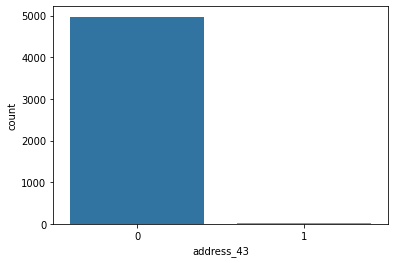

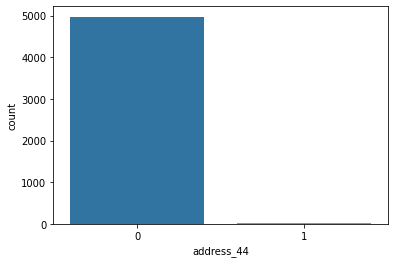

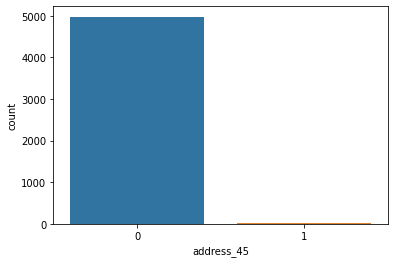

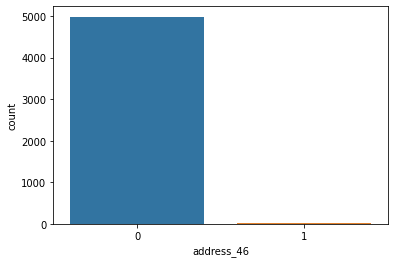

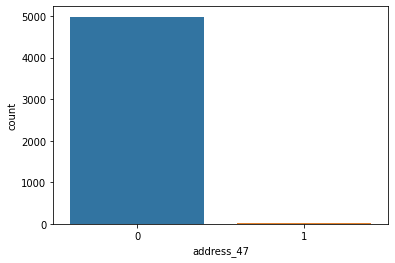

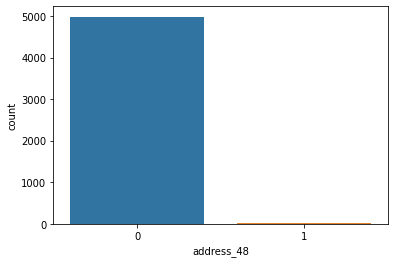

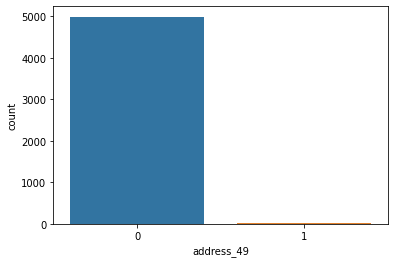

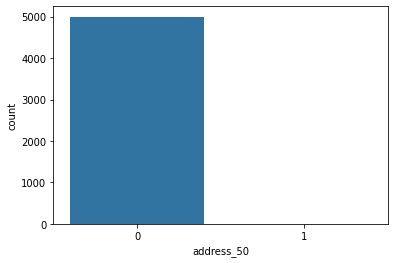

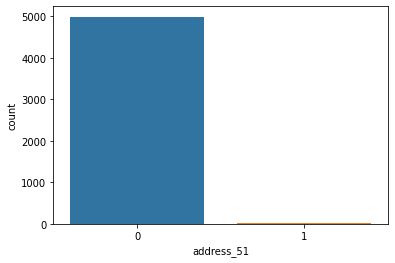

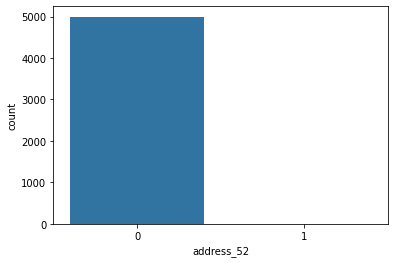

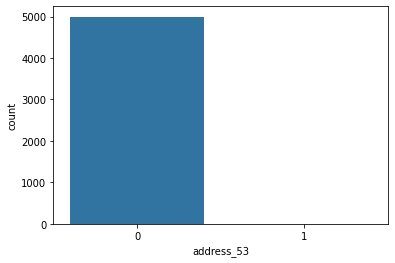

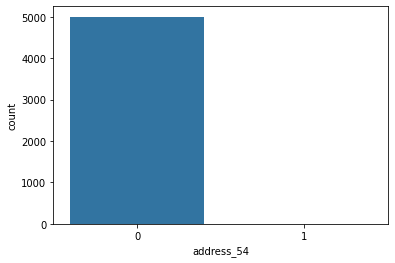

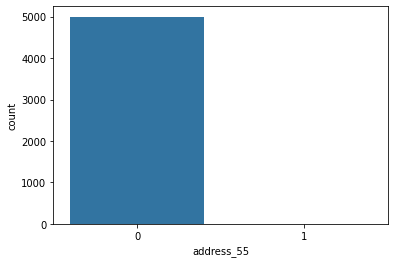

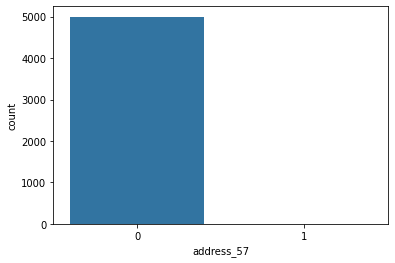

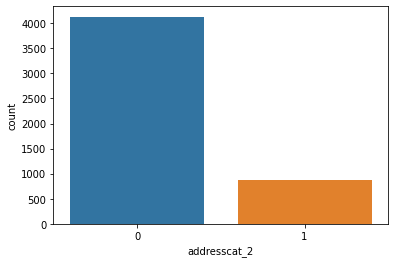

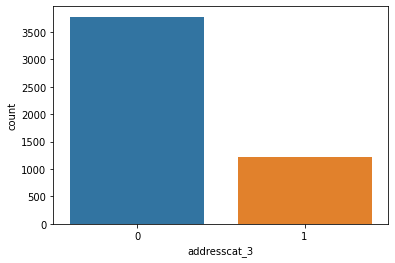

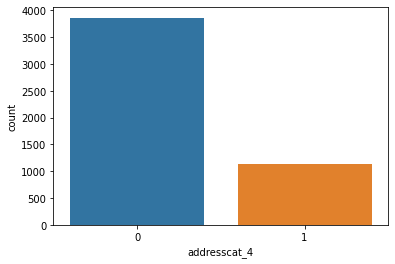

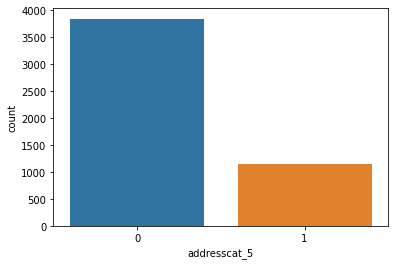

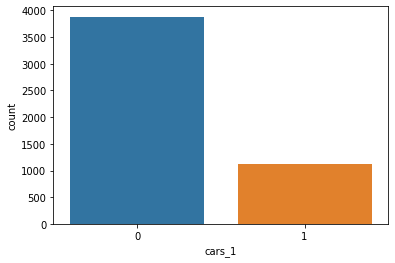

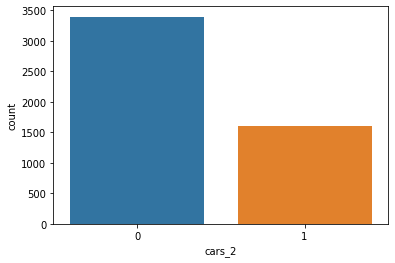

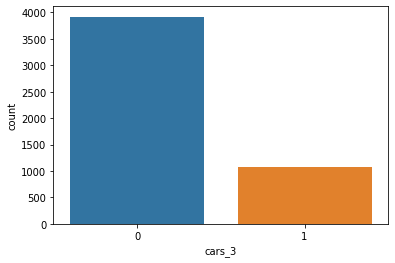

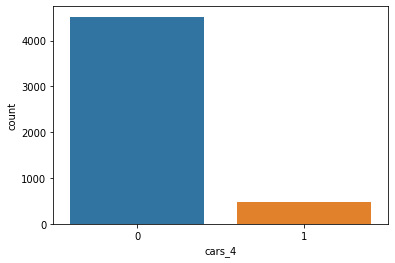

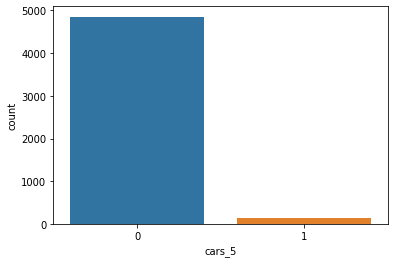

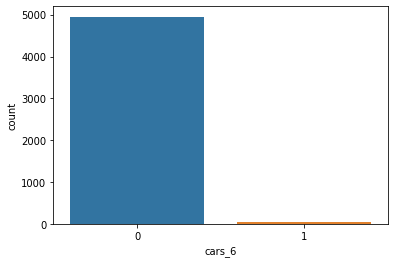

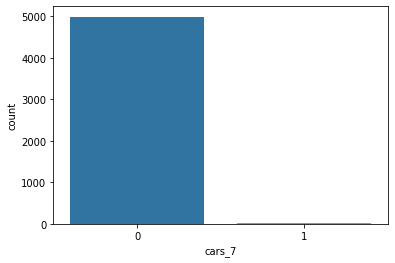

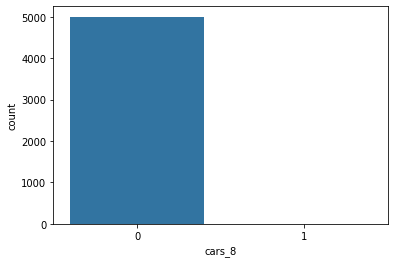

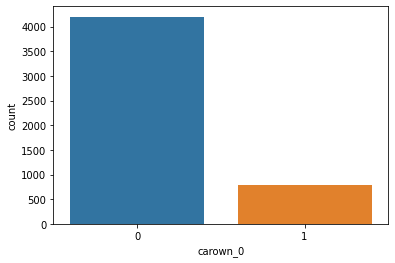

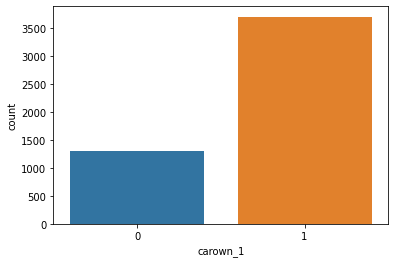

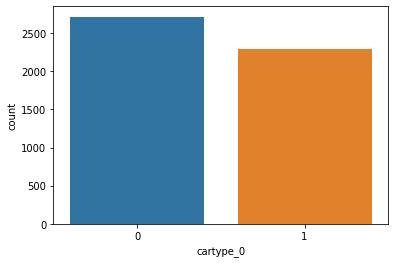

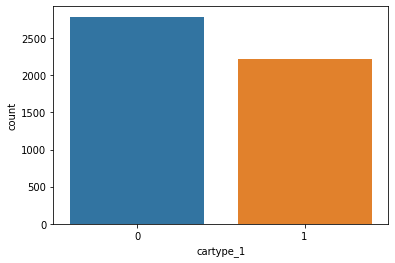

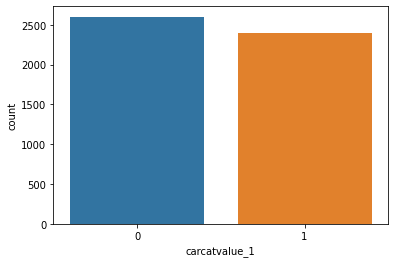

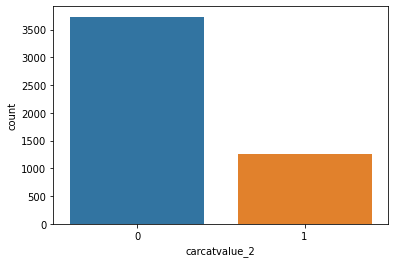

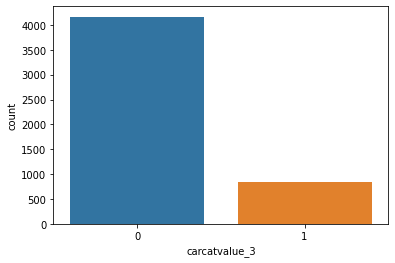

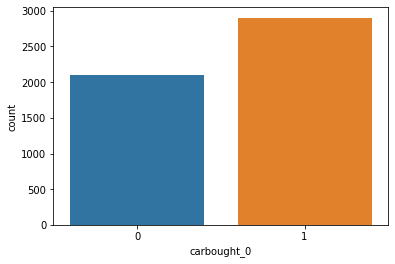

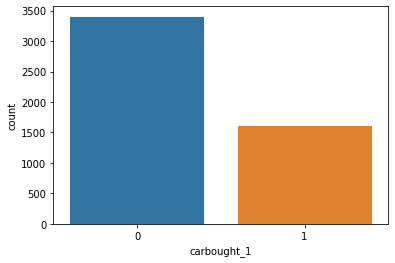

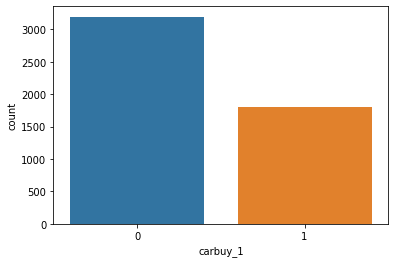

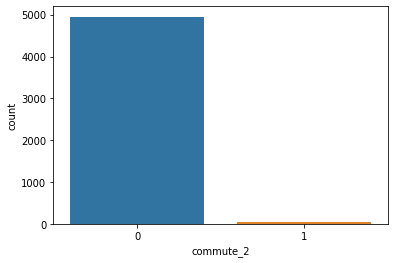

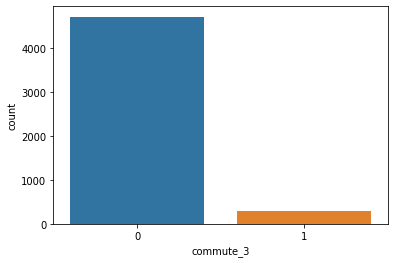

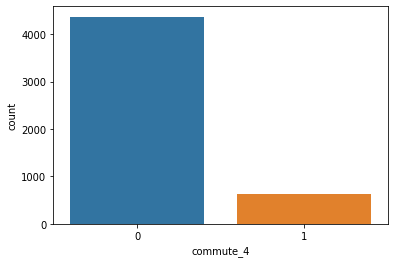

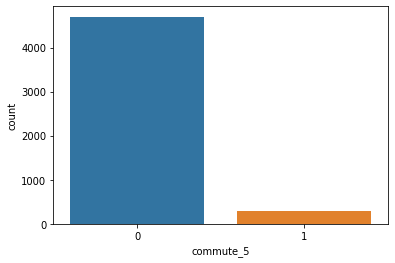

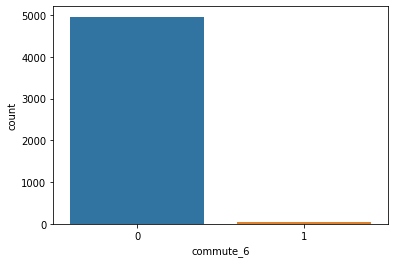

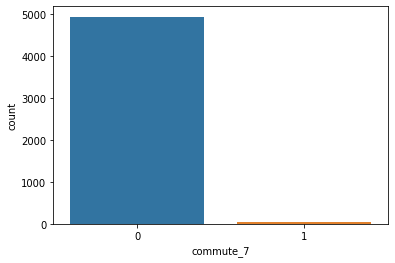

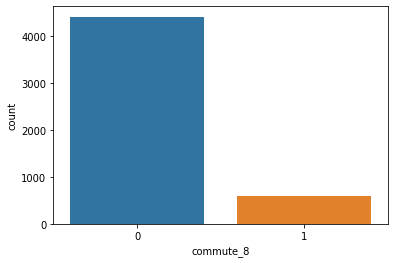

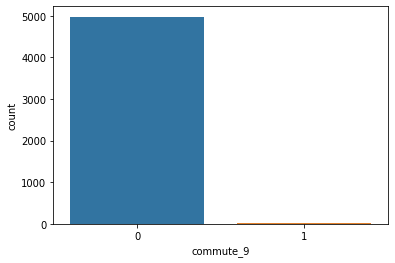

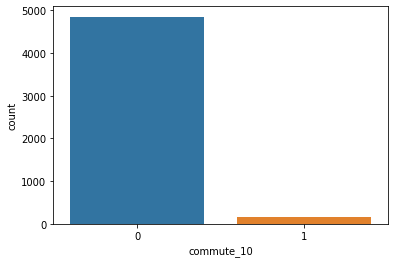

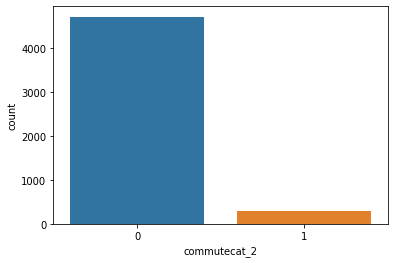

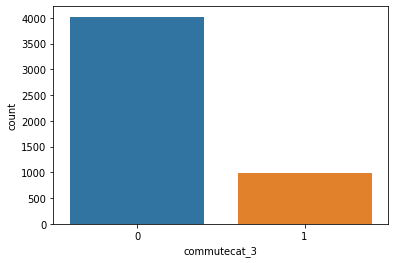

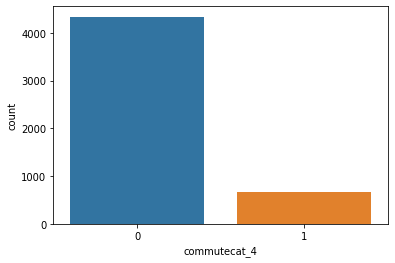

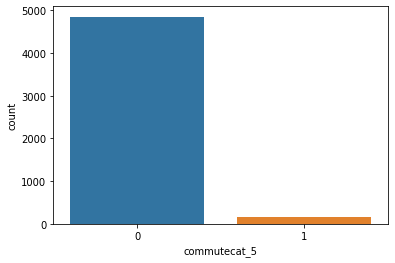

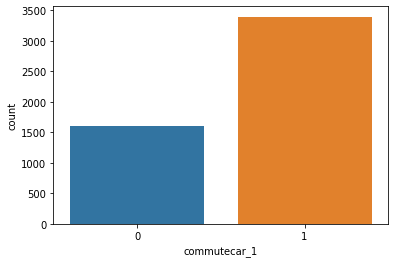

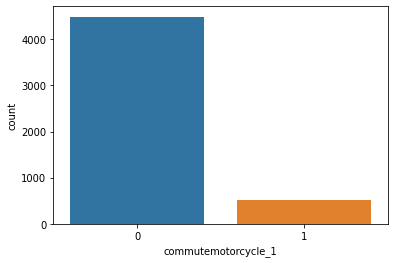

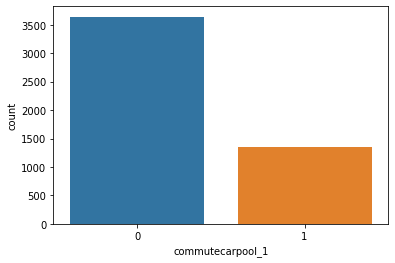

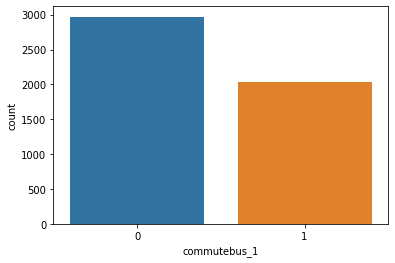

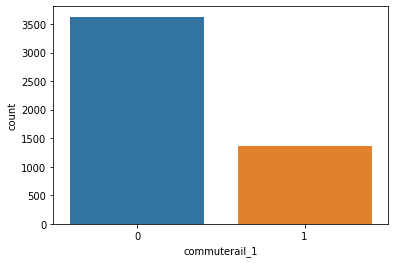

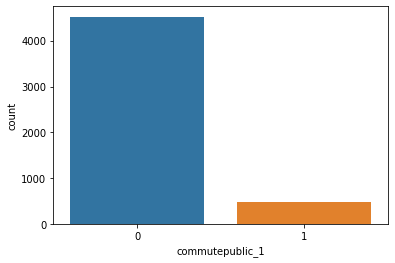

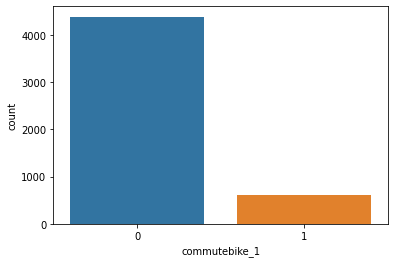

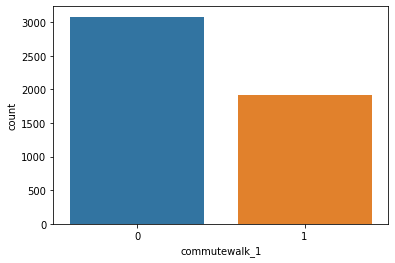

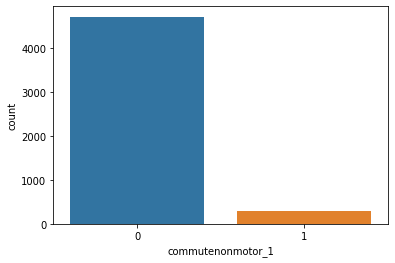

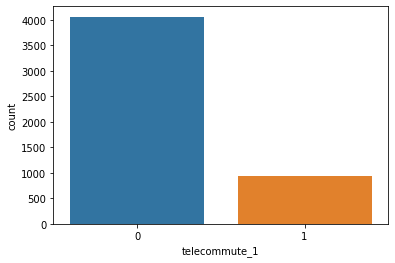

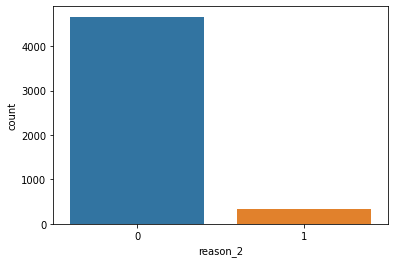

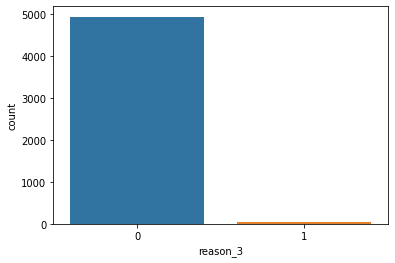

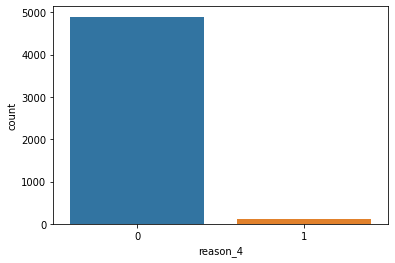

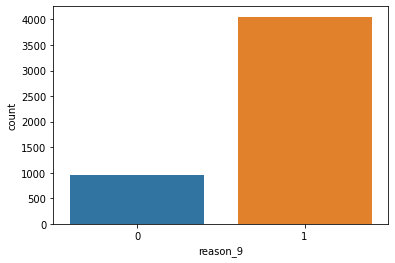

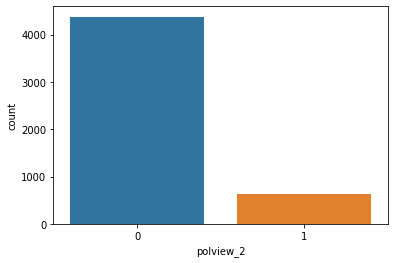

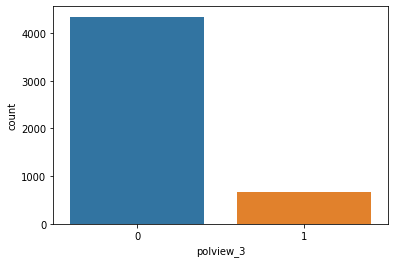

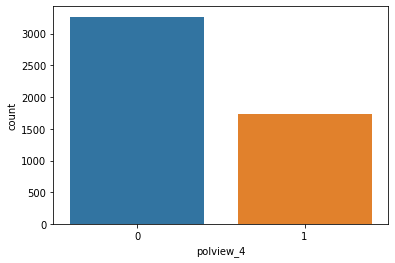

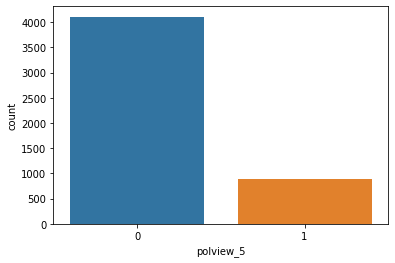

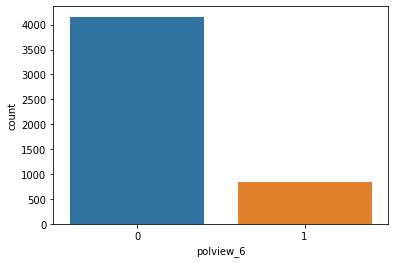

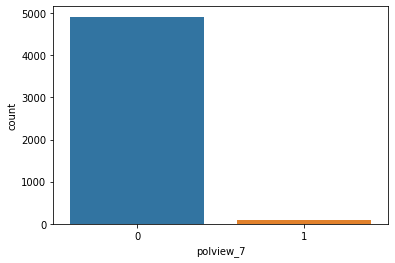

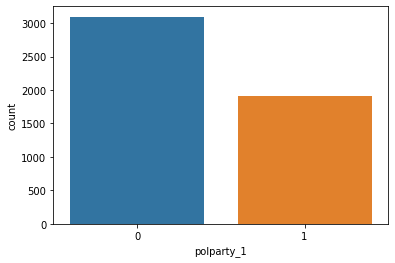

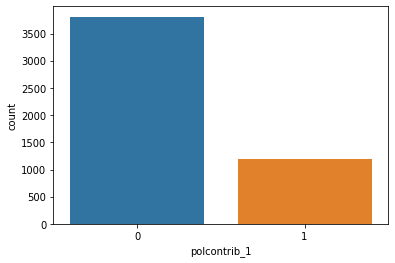

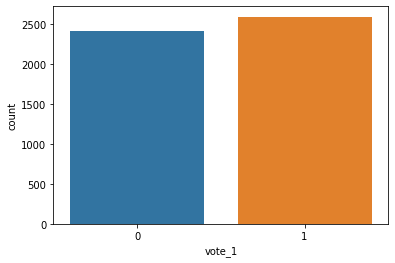

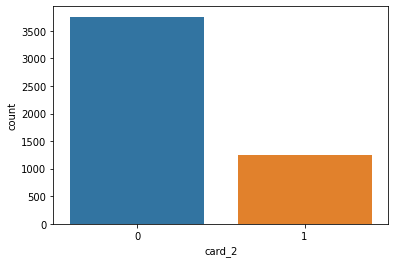

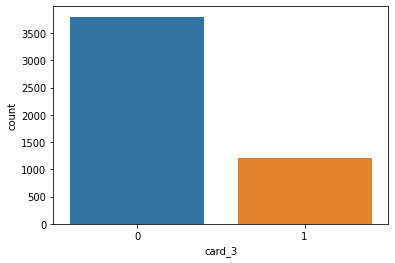

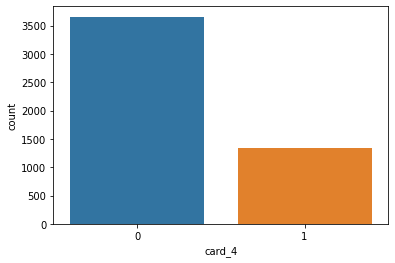

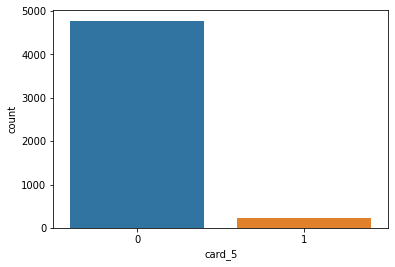

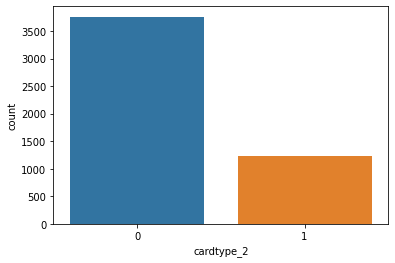

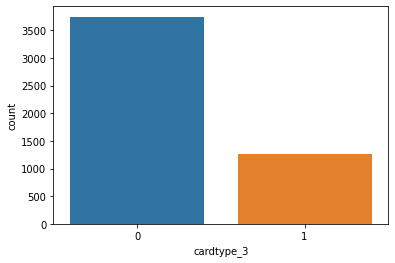

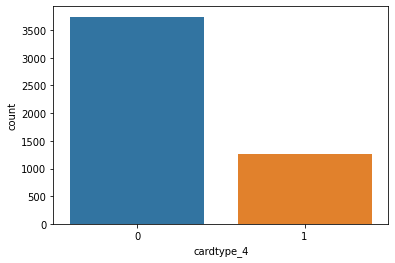

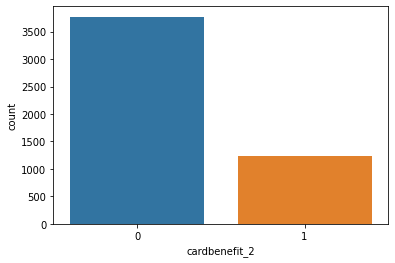

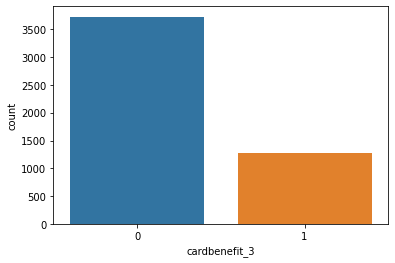

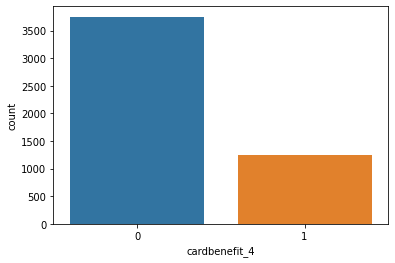

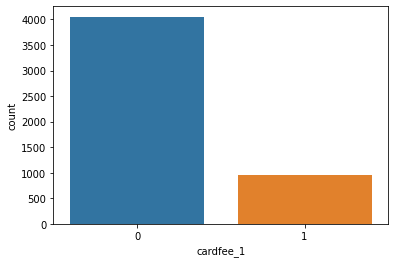

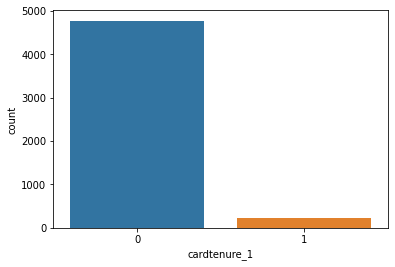

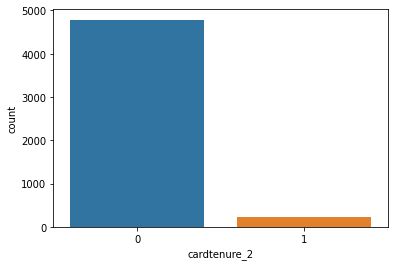

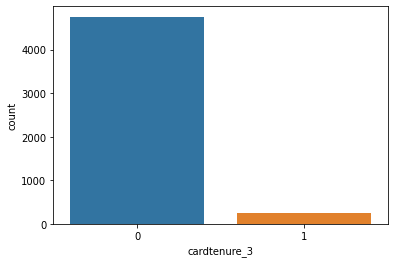

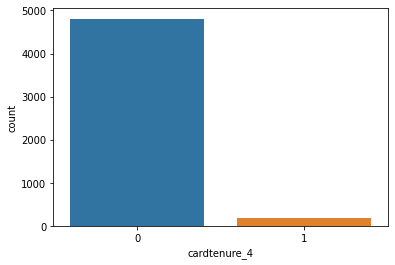

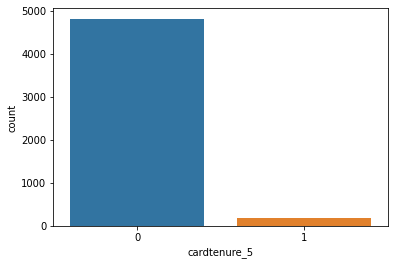

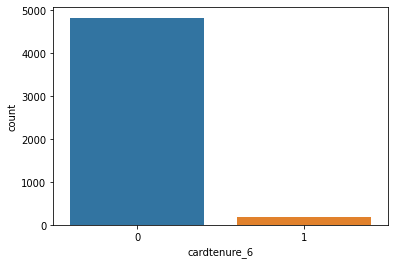

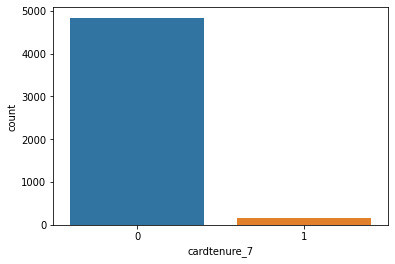

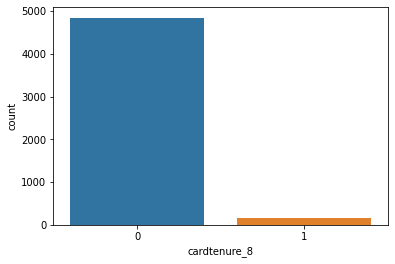

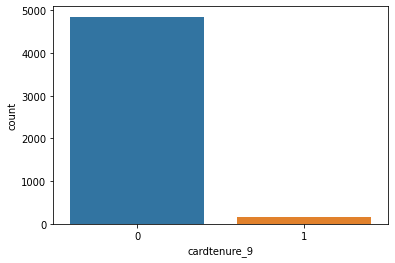

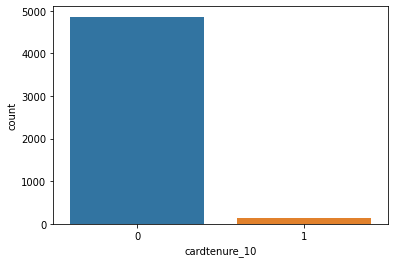

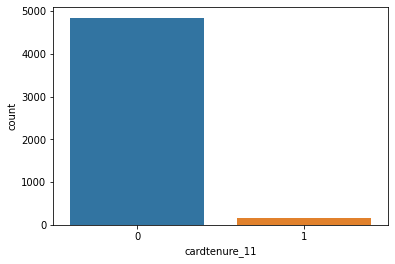

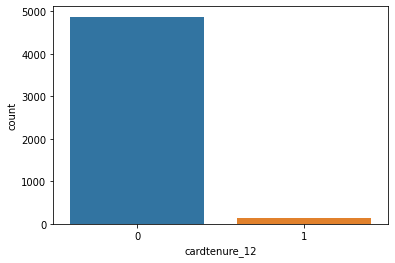

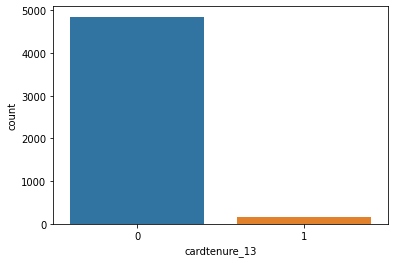

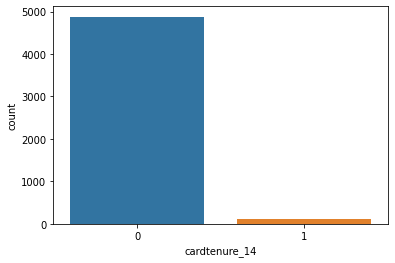

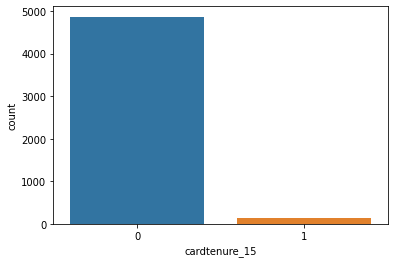

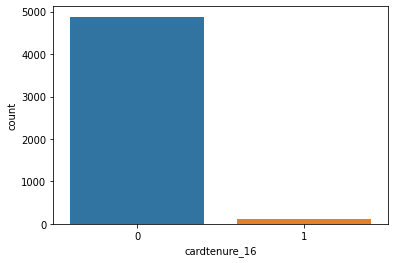

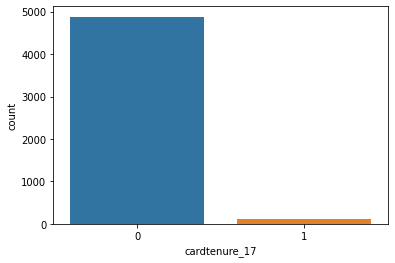

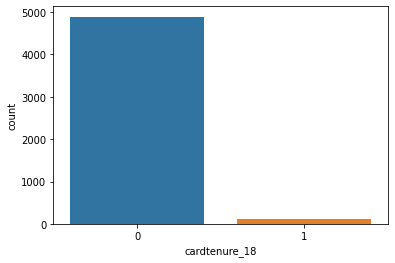

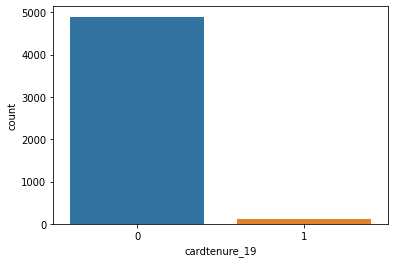

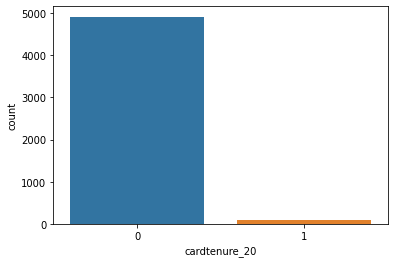

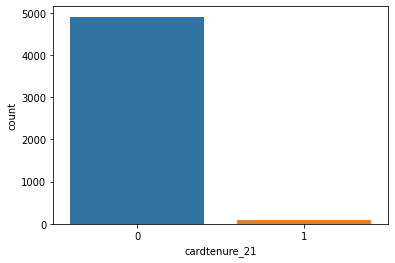

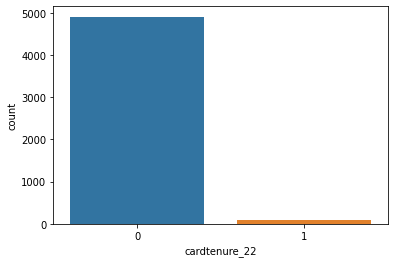

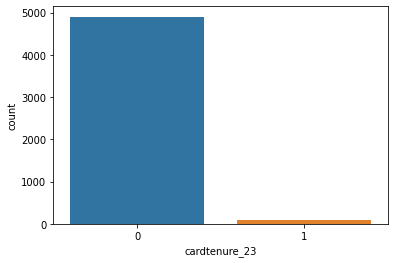

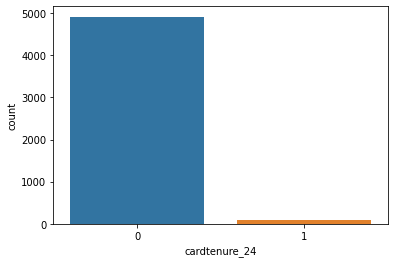

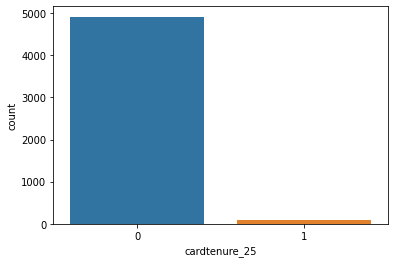

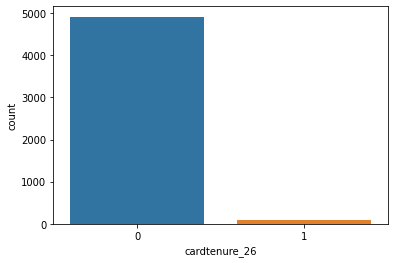

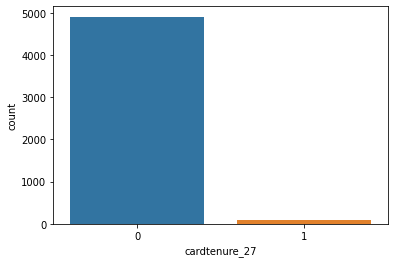

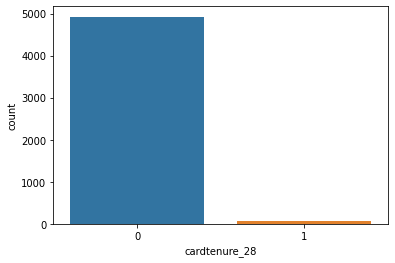

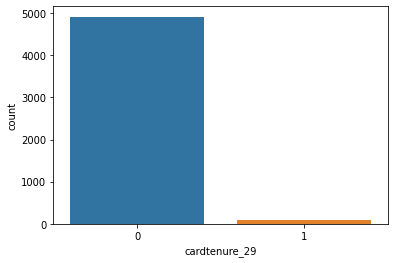

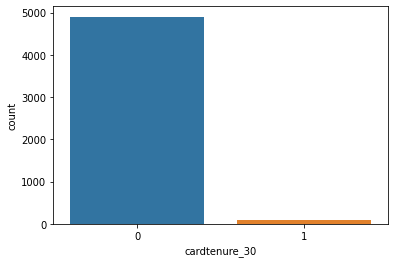

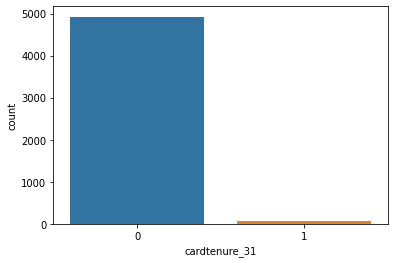

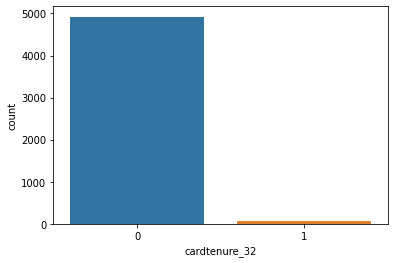

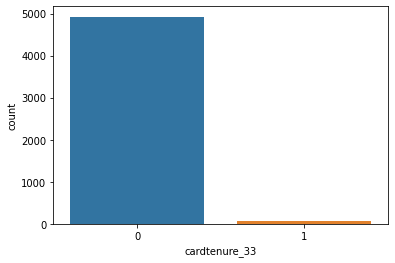

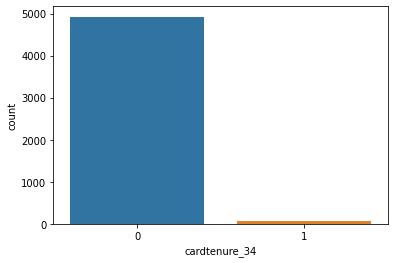

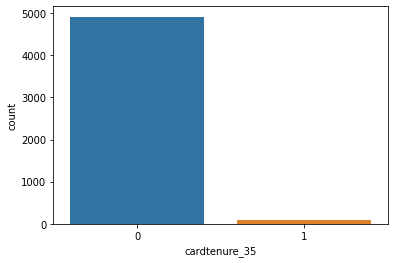

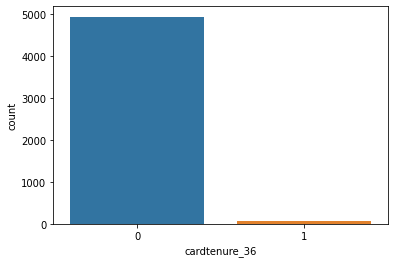

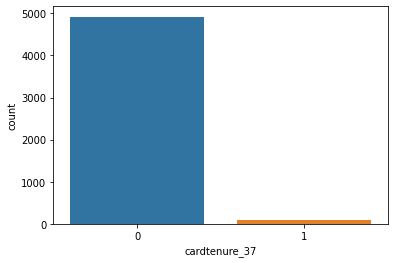

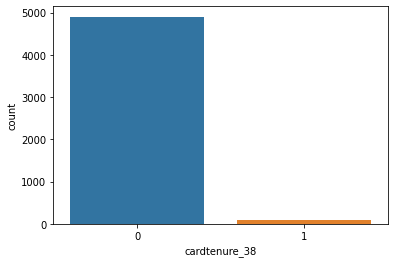

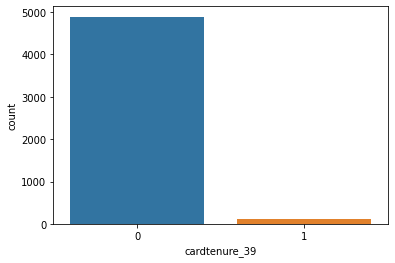

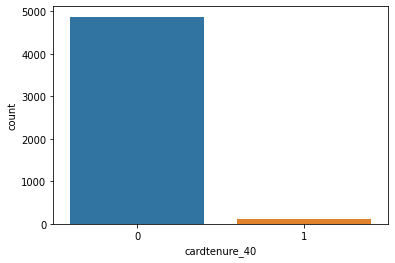

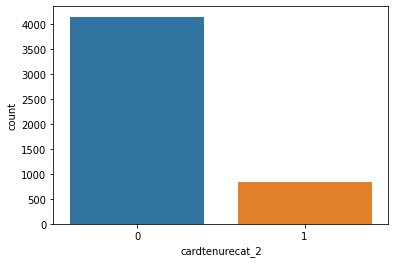

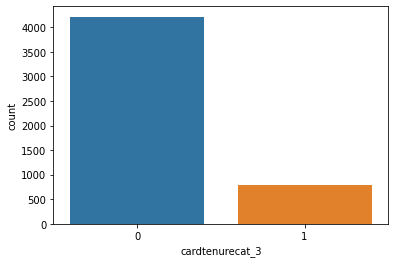

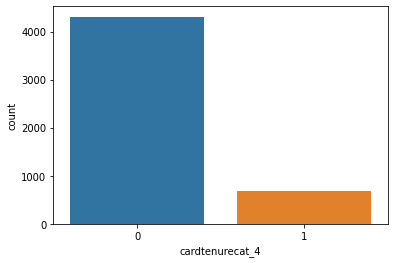

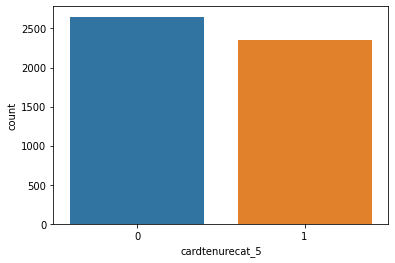

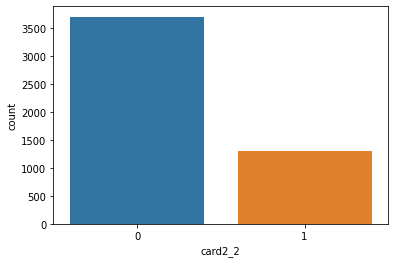

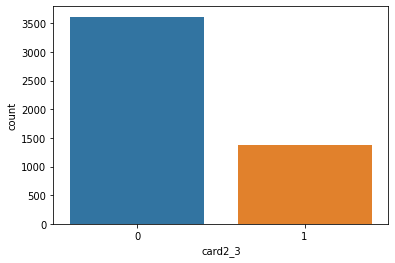

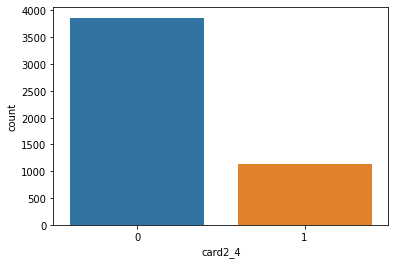

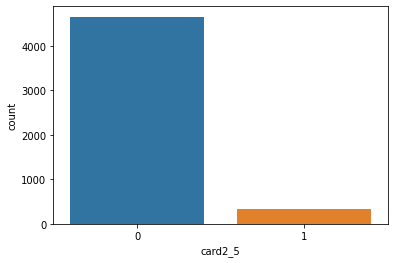

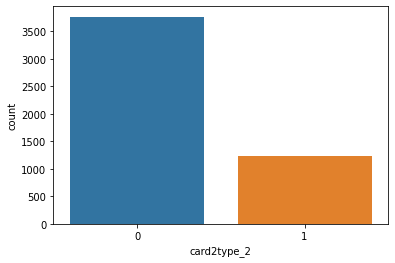

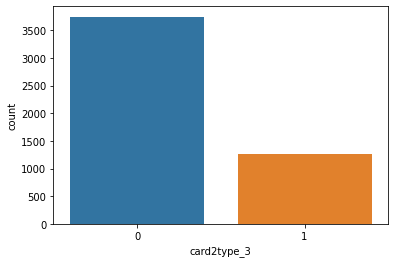

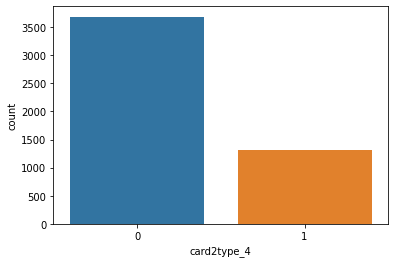

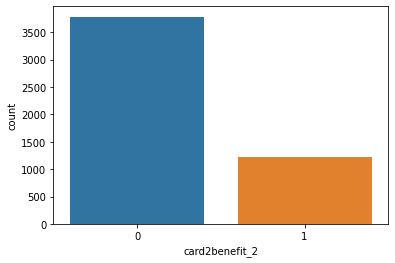

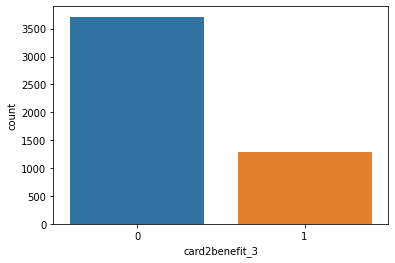

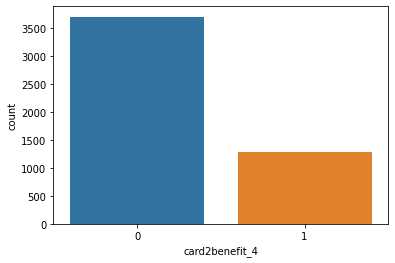

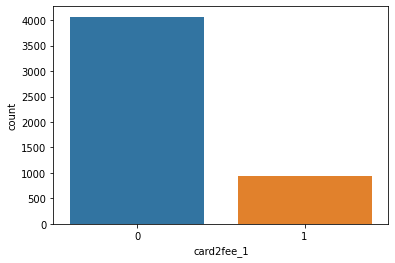

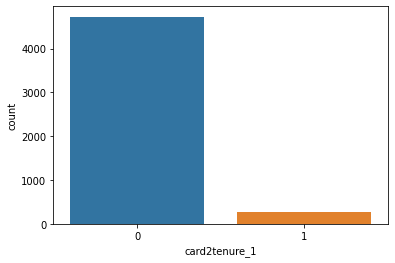

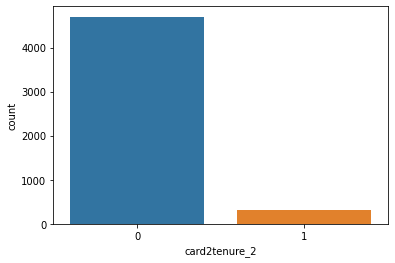

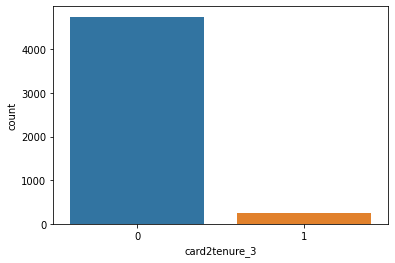

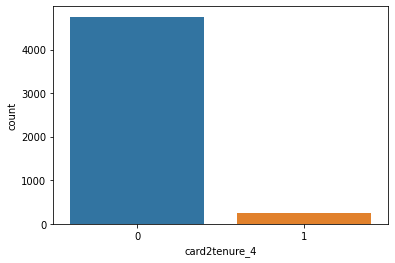

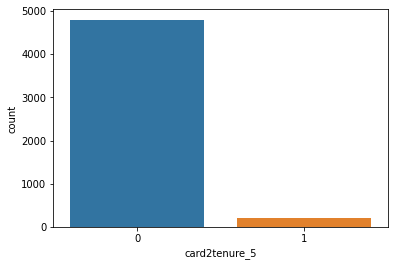

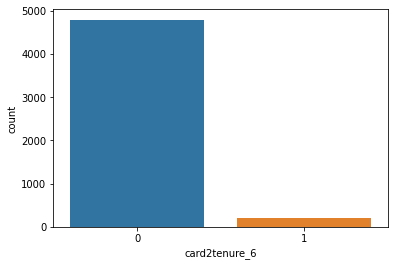

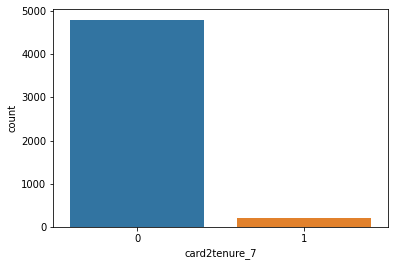

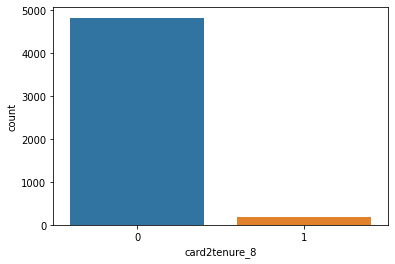

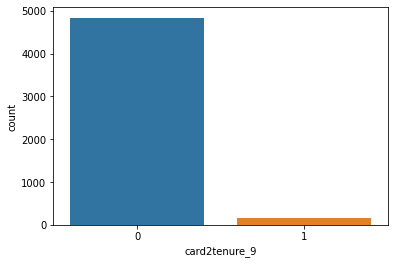

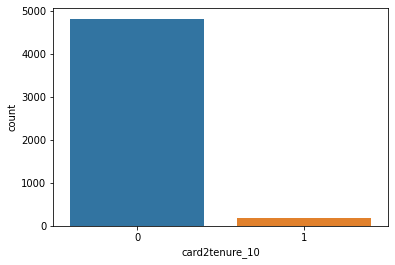

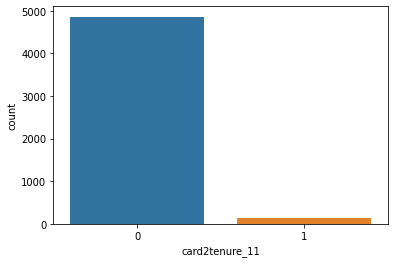

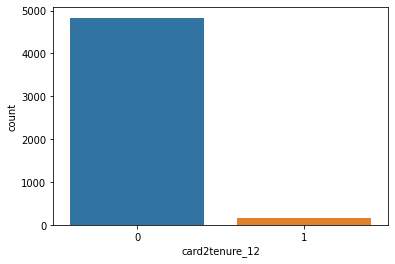

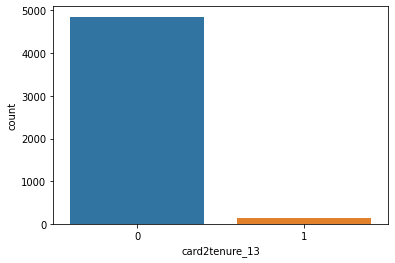

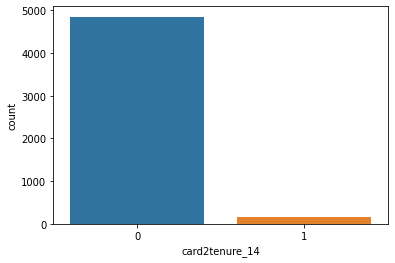

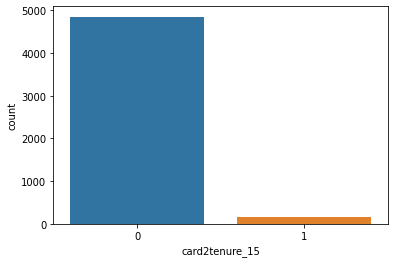

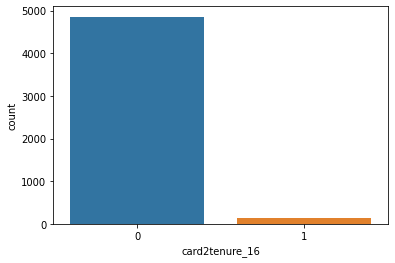

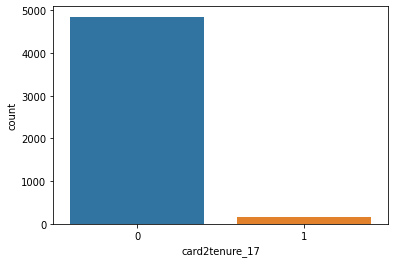

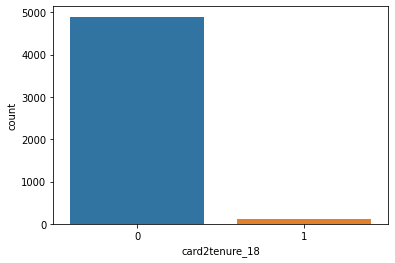

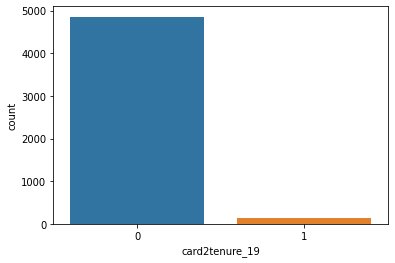

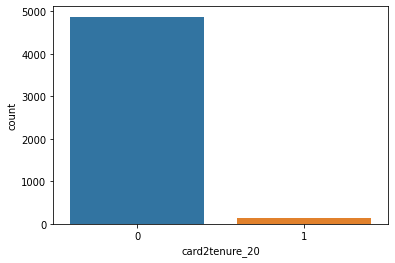

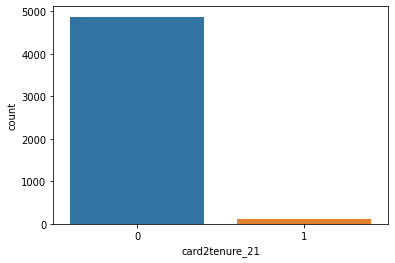

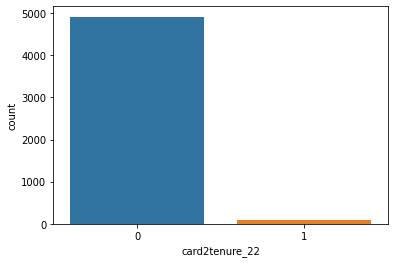

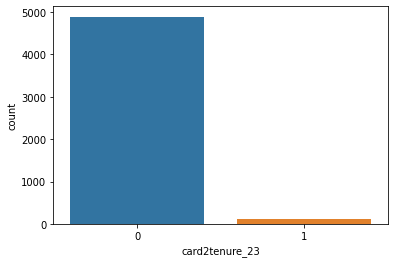

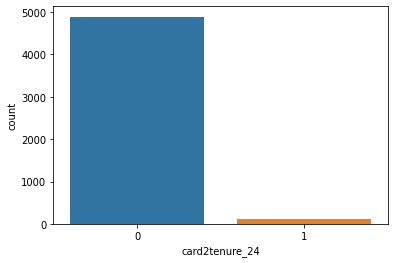

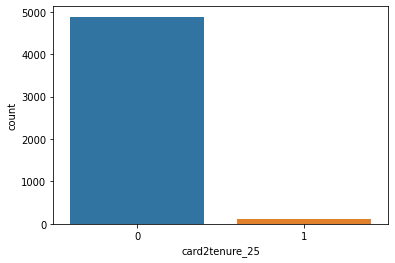

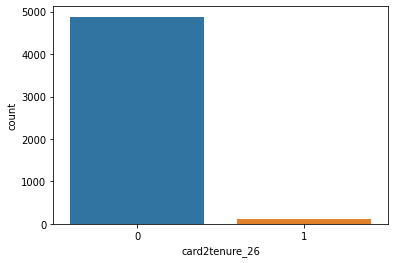

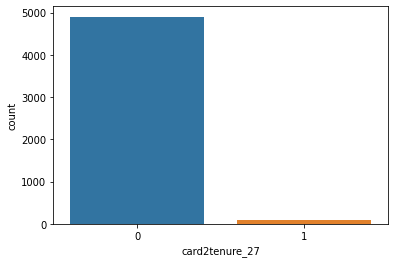

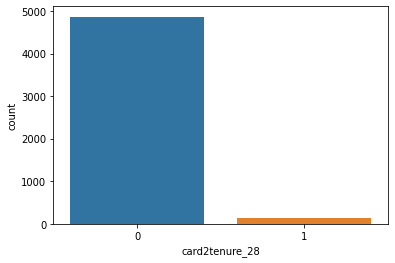

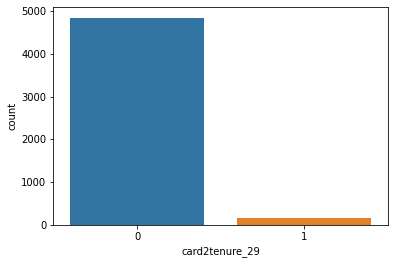

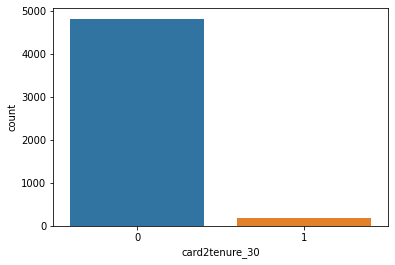

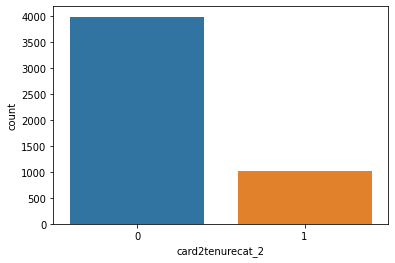

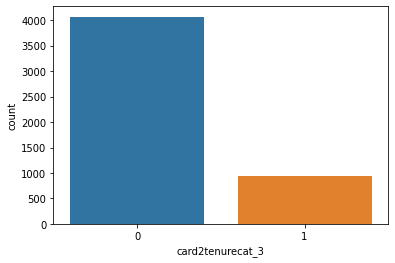

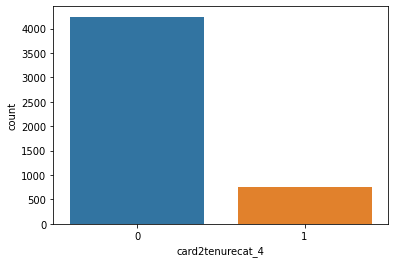

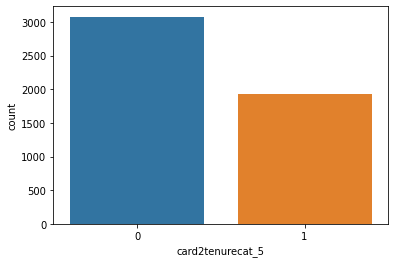

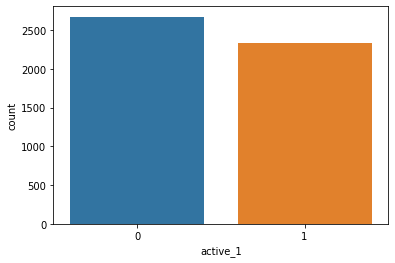

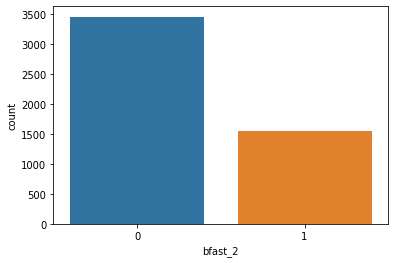

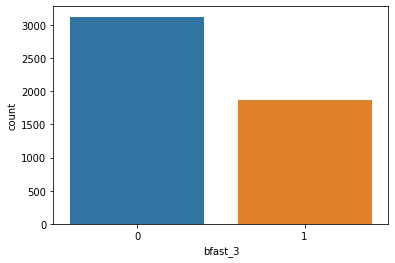

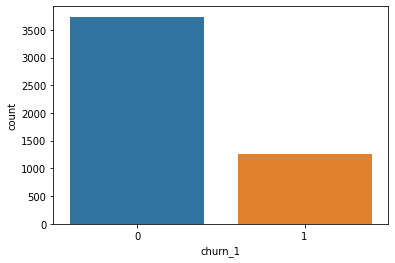

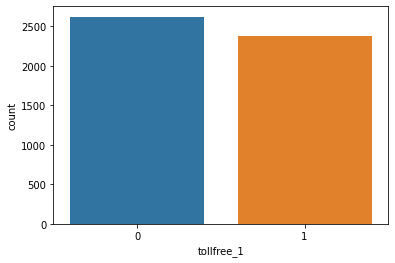

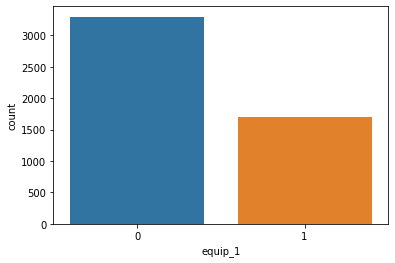

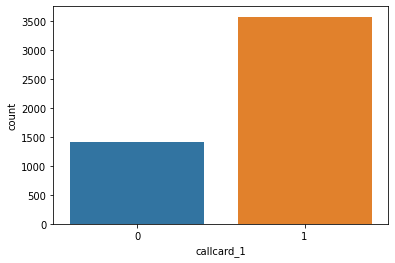

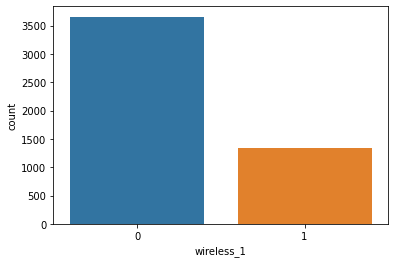

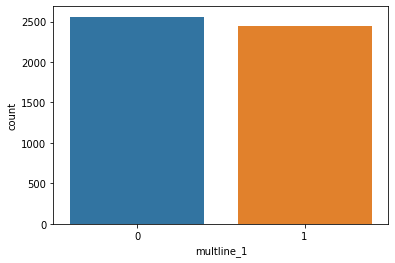

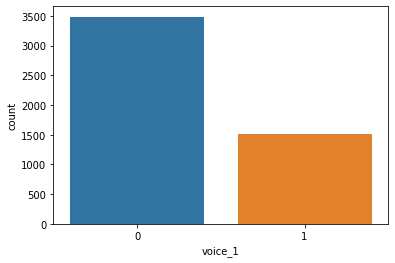

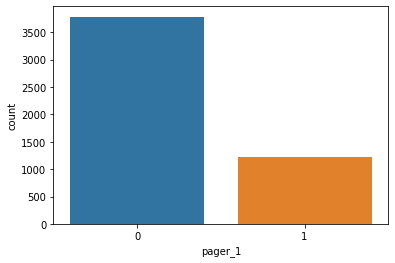

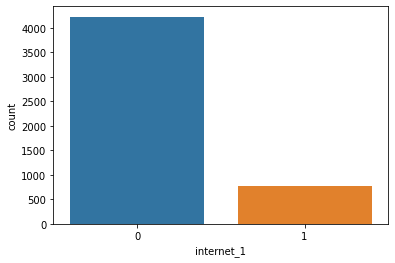

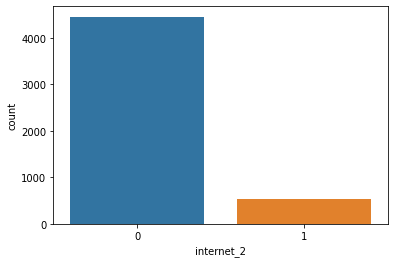

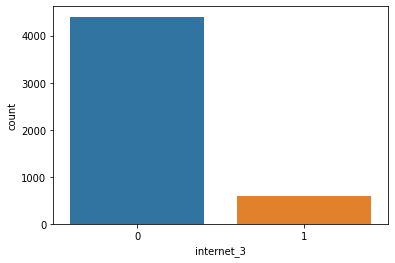

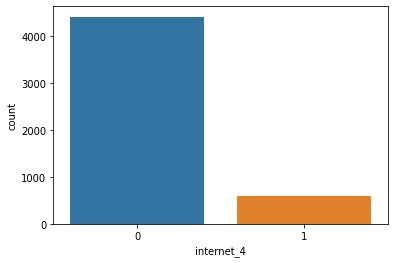

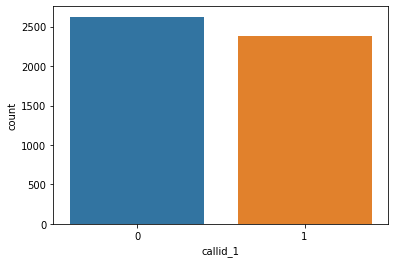

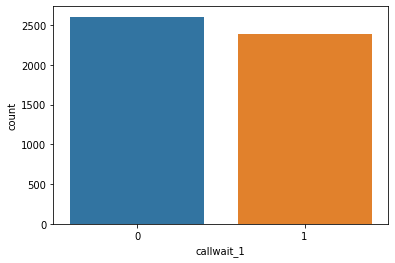

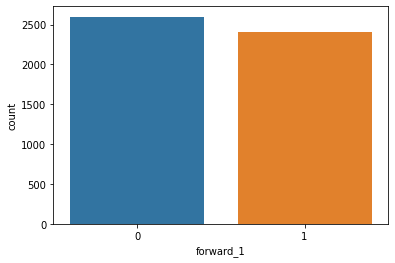

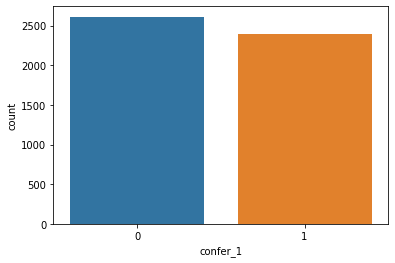

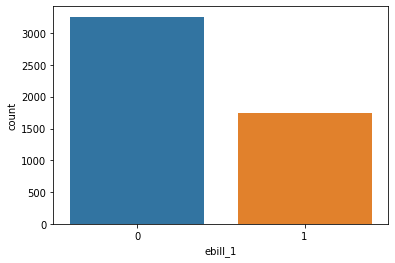

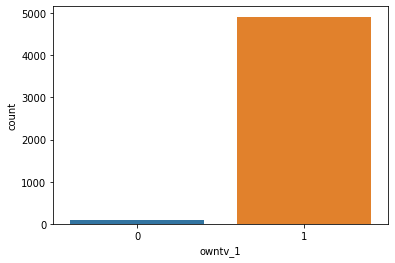

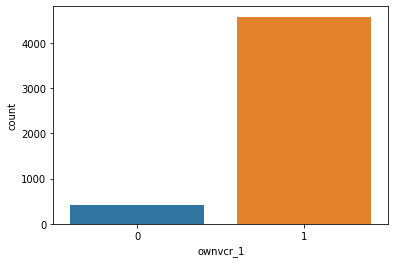

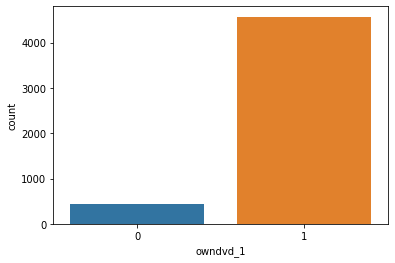

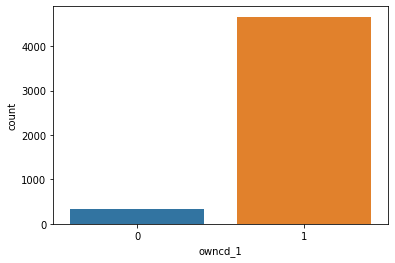

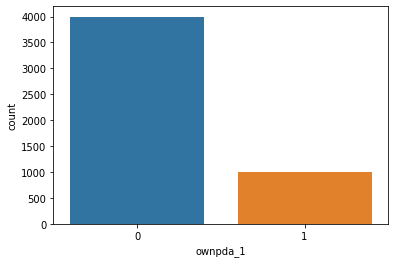

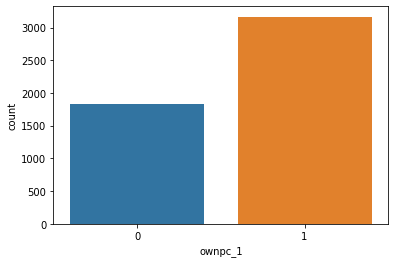

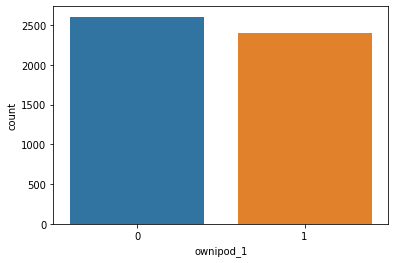

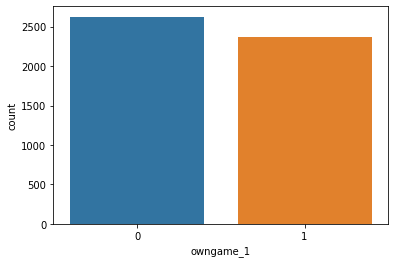

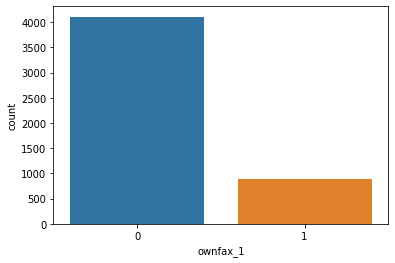

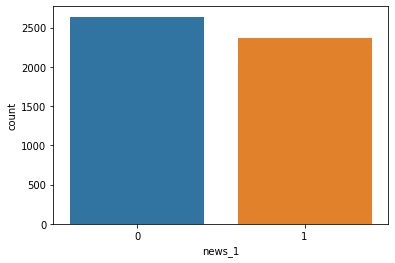

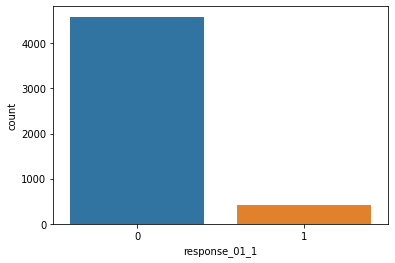

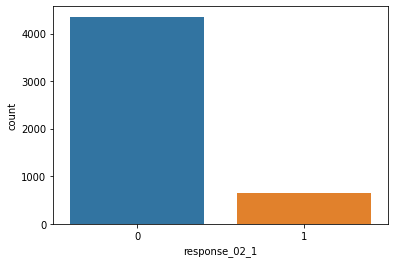

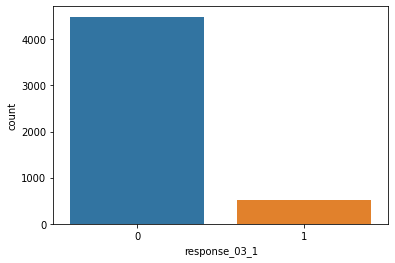

region_2         None
region_3         None
region_4         None
region_5         None
townsize_2.0     None
                 ... 
ownfax_1         None
news_1           None
response_01_1    None
response_02_1    None
response_03_1    None
Length: 356, dtype: object

In [28]:
#Let's Visualize and see what kind of data we got
d_cat_var.apply(count_charts)

In [29]:
#final data for modelling 
final = pd.concat([d_con_var, d_cat_var],axis = 1)

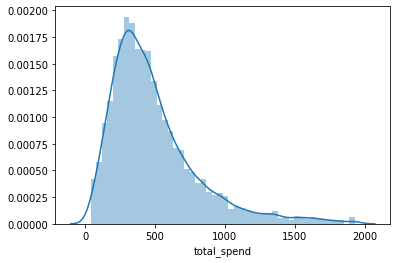

In [30]:
#Visualising the target(Y) variable
sns.distplot(final.total_spend)

In [31]:
# as the data is skewed to the left we need to balance it by taking the log
final['ln_total_spend'] = np.log(final['total_spend']+1)

In [32]:
#removing Y var from data
features = final.columns.difference(['ln_total_spend','total_spend'])
features

Index(['active_1', 'address_1', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'union_1', 'voice_1', 'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=399)

In [33]:
#correlation matrix
cor_mat = d_con_var.corr()
cor_mat.to_csv('cor_mat.csv')

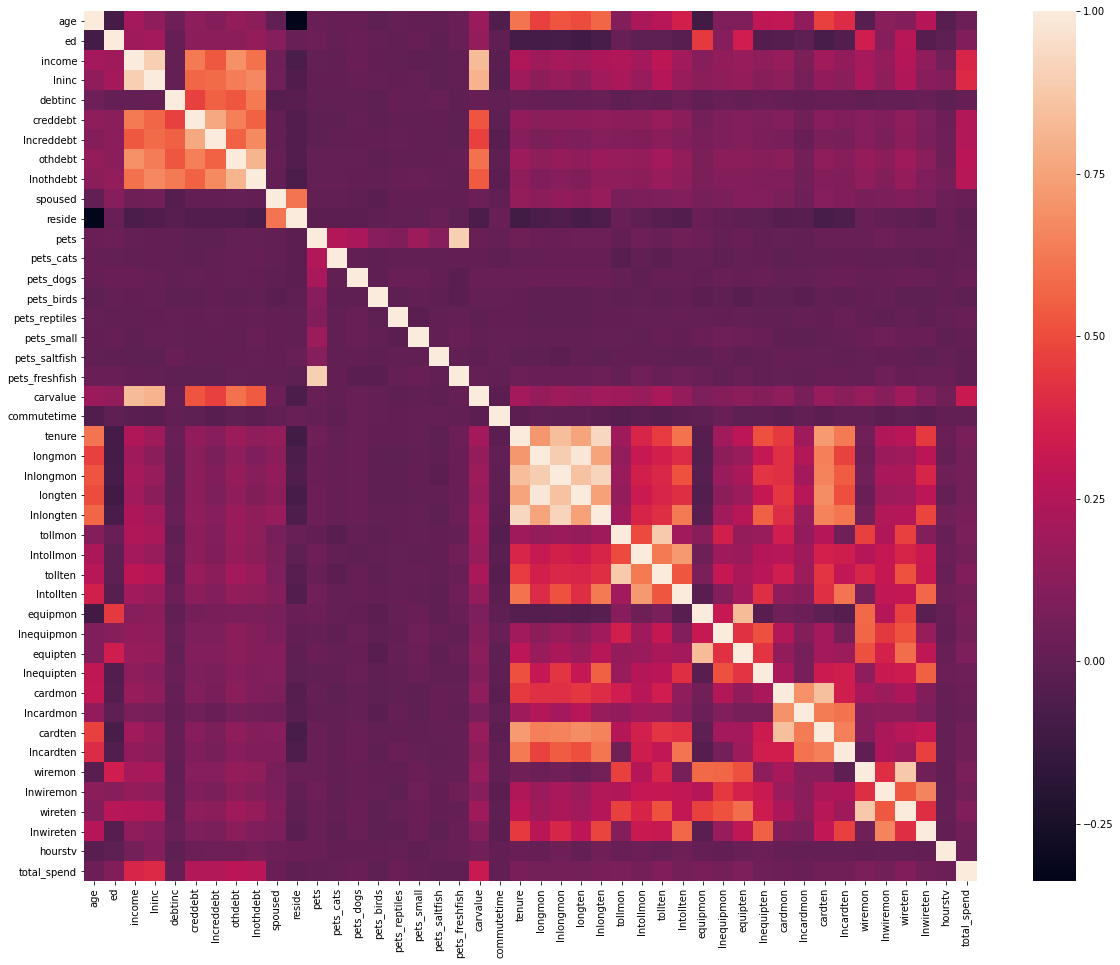

In [34]:
#Heat map for corelation matrix
plt.figure(figsize=(20,16))
sns.heatmap(cor_mat)

In [35]:
#  divide the data into training and testing 
train, test = train_test_split(final, test_size = 0.3, random_state = 12345)
train

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
509,43,11,60.0,4.094345,7.4,2.362080,0.859543,2.077920,0.731367,11,...,0,1,1,0,0,1,0,0,0,6.745130
3847,72,12,191.0,5.252273,9.7,7.744286,2.046955,10.782714,2.377944,-1,...,0,1,0,0,0,1,0,0,1,6.421476
3417,68,10,87.0,4.465908,5.3,0.894534,-0.111452,3.716466,1.312773,12,...,1,0,0,0,0,1,0,1,0,6.267106
382,37,13,16.0,2.772589,11.8,0.653248,-0.425798,1.234752,0.210870,-1,...,0,1,1,1,1,1,0,1,0,5.806279
1345,56,10,32.0,3.465736,15.8,1.066816,0.064679,3.989184,1.383587,8,...,0,0,0,0,0,1,0,0,0,6.744766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,47,18,90.0,4.499810,22.0,3.366000,1.213725,16.434000,2.799352,-1,...,1,1,1,1,1,0,0,0,0,5.384082
3492,29,21,62.0,4.127134,1.4,0.265608,-1.325734,0.602392,-0.506847,-1,...,0,1,1,1,1,0,0,1,0,6.565645
2177,61,15,29.0,3.367296,2.1,0.121800,-2.105375,0.487200,-0.719081,15,...,0,1,0,0,0,1,0,0,0,5.128063
3557,52,18,108.0,4.682131,13.9,1.501200,0.406265,13.510800,2.603489,20,...,1,0,0,1,1,1,0,0,0,6.682660


### Feature/variable Reduction(automatic threw F-Regression) 

In [36]:
#import F-regression
from sklearn.feature_selection import f_regression

In [37]:
# run the F regression to get the significant variables
Features_1 = final[features]
target = final['ln_total_spend']
F_values, p_values  = f_regression( Features_1, target )

In [38]:
# get the results in the dataframe
F_Regression_results = pd.concat([pd.Series(Features_1.columns), 
                            pd.Series(F_values), pd.Series(p_values).round(3)], axis = 1)

# add the column names
F_Regression_results.columns = ['feature', 'F_value', 'p_value']

In [39]:
F_Regression_results

,feature,F_value,p_value
0,active_1,0.102793,0.749
1,address_1,9.936140,0.002
2,address_10,1.055209,0.304
3,address_11,0.991326,0.319
4,address_12,0.057405,0.811
...,...,...,...
394,voice_1,10.056252,0.002
395,vote_1,15.896945,0.000
396,wireless_1,27.241875,0.000
397,wiremon,37.755633,0.000


In [40]:
# Filter the data where p is <= 0.100 and important for modellintg purpose
Features_2 = F_Regression_results.loc[ F_Regression_results.p_value <= 0.100, 'feature' ]

In [41]:
# as we can see that after f-regression only 154 features has been selected which holds importance in model building
Features_2

1       address_1
6      address_14
7      address_15
10     address_18
12      address_2
          ...    
394       voice_1
395        vote_1
396    wireless_1
397       wiremon
398       wireten
Name: feature, Length: 154, dtype: object

In [42]:
# get the results in the dataframe
F_Regression_Output = pd.DataFrame([Features_2, F_values, p_values.round(4)]).T

# add the column names
F_Regression_Output.columns = ['features', 'F_values', 'p_values']

In [43]:
F_Regression_Output

,features,F_values,p_values
1,address_1,9.93614,0.0016
6,address_14,3.5286,0.0604
7,address_15,3.7758,0.0521
10,address_18,3.53216,0.0602
12,address_2,2.7221,0.099
...,...,...,...
394,voice_1,10.0563,0.0015
395,vote_1,15.8969,0.0001
396,wireless_1,27.2419,0
397,wiremon,37.7556,0


In [44]:
f_reg_feature = list(F_Regression_Output.features)

In [45]:
f_reg_feature

['address_1',
 'address_14',
 'address_15',
 'address_18',
 'address_2',
 'address_22',
 'address_28',
 'address_3',
 'address_32',
 'address_4',
 'addresscat_2',
 'addresscat_3',
 'addresscat_4',
 'agecat_3',
 'agecat_4',
 'agecat_5',
 'agecat_6',
 'bfast_2',
 'bfast_3',
 'callid_1',
 'callwait_1',
 'carcatvalue_1',
 'carcatvalue_2',
 'carcatvalue_3',
 'card2_2',
 'card2_3',
 'card2_4',
 'card2_5',
 'card2benefit_3',
 'card2tenure_1',
 'card2tenure_15',
 'card2tenure_19',
 'card2tenure_20',
 'card2tenure_26',
 'card2tenure_3',
 'card2tenure_4',
 'card2tenure_7',
 'card2tenure_8',
 'card2tenurecat_2',
 'card2tenurecat_4',
 'card2tenurecat_5',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'cardten',
 'cardtenure_1',
 'cardtenure_15',
 'cardtenure_19',
 'cardtenure_21',
 'cardtenure_29',
 'cardtenure_31',
 'cardtenure_4',
 'cardtenure_6',
 'cardtenurecat_2',
 'cardtenurecat_3',
 'cardtenurecat_4',
 'cardtenurecat_5',
 'carown_0',
 'carown_1',
 'cars_1',
 'cartype_0',
 'carvalue',
 'commut

In [46]:
#creating our first model which contain final list of independent variables
model_1 = 'ln_total_spend ~'+'+'.join(f_reg_feature)
model_1

'ln_total_spend ~address_1+address_14+address_15+address_18+address_2+address_22+address_28+address_3+address_32+address_4+addresscat_2+addresscat_3+addresscat_4+agecat_3+agecat_4+agecat_5+agecat_6+bfast_2+bfast_3+callid_1+callwait_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2tenure_1+card2tenure_15+card2tenure_19+card2tenure_20+card2tenure_26+card2tenure_3+card2tenure_4+card2tenure_7+card2tenure_8+card2tenurecat_2+card2tenurecat_4+card2tenurecat_5+card_2+card_3+card_4+card_5+cardten+cardtenure_1+cardtenure_15+cardtenure_19+cardtenure_21+cardtenure_29+cardtenure_31+cardtenure_4+cardtenure_6+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+carown_0+carown_1+cars_1+cartype_0+carvalue+commute_4+commutebike_1+confer_1+creddebt+ebill_1+ed+edcat_2+edcat_4+edcat_5+empcat_4+empcat_5+employ_1+employ_13+employ_14+employ_16+employ_17+employ_19+employ_24+employ_26+employ_32+employ_40+employ_52+equip_1+equipmon+equipten+forward_1+gen

In [47]:
model_1 = '''ln_total_spend ~address_1+address_14+address_15+address_18+address_2+address_22+address_28+address_3+address_32
+address_4+addresscat_2+addresscat_3+addresscat_4+agecat_3+agecat_4+agecat_5+agecat_6+bfast_2+bfast_3+callid_1+callwait_1
+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2tenure_1+card2tenure_15+
card2tenure_19+card2tenure_20+card2tenure_26+card2tenure_3+card2tenure_4+card2tenure_7+card2tenure_8+card2tenurecat_2+
card2tenurecat_4+card2tenurecat_5+card_2+card_3+card_4+card_5+cardten+cardtenure_1+cardtenure_15+cardtenure_19+cardtenure_21+
cardtenure_29+cardtenure_31+cardtenure_4+cardtenure_6+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5
+cars_1+cartype_0+carvalue+commute_4+commutebike_1+confer_1+creddebt+ebill_1+ed+edcat_2+edcat_4+edcat_5+empcat_4+
empcat_5+employ_1+employ_13+employ_14+employ_16+employ_17+employ_19+employ_24+employ_26+employ_32+employ_40+employ_52+equip_1
+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hometype_3+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+income+
internet_3+internet_4+jobcat_2+jobcat_3+jobsat_4+jobsat_5+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten
+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+multline_1+news_1+othdebt+owncd_1+owndvd_1+ownfax_1+
owngame_1+ownipod_1+ownpc_1+ownpda_1+owntv_1+ownvcr_1+pager_1+polcontrib_1+polview_4+polview_6+reason_2+reason_4+region_5+
response_02_1+response_03_1+retire_1+spoused+spousedcat_1+spousedcat_3+spousedcat_4+tenure+tollfree_1+tollmon+tollten+
voice_1+vote_1+wireless_1+wiremon+wireten'''

### Removing multicolinearity threw VIF(Variance Inflation Factor) 

In [48]:
# import the packages for vif - Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [49]:
y, X = dmatrices(model_1, final, return_type = 'dataframe')

In [50]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['f_reg_feature'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,f_reg_feature,VIF Factor
0,Intercept,39952.383240
1,address_1,1.672395
2,address_14,1.185331
3,address_15,1.182235
4,address_18,1.157480
...,...,...
145,voice_1,2.231787
146,vote_1,1.085059
147,wireless_1,183.313435
148,wiremon,272.754859


In [51]:
vif.to_csv('VIF1.csv')

In [52]:
corr_mat_final = final[f_reg_feature].corr()
corr_mat_final.to_csv("fin_COR.csv")

###  Building a Linear Regression Model

In [53]:
#final model after vif
model_2 = '''ln_total_spend ~address_1+address_14+address_15+address_18+address_2+address_22+address_28+address_3+address_32
+address_4+addresscat_2+addresscat_3+addresscat_4+agecat_3+agecat_4+agecat_5+agecat_6+bfast_2+bfast_3+callid_1+callwait_1
+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2tenure_1+card2tenure_15+
card2tenure_19+card2tenure_20+card2tenure_26+card2tenure_3+card2tenure_4+card2tenure_7+card2tenure_8+card2tenurecat_2+
card2tenurecat_4+card2tenurecat_5+card_2+card_3+card_4+card_5+cardten+cardtenure_1+cardtenure_15+cardtenure_19+cardtenure_21+
cardtenure_29+cardtenure_31+cardtenure_4+cardtenure_6+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5
+cars_1+cartype_0+carvalue+commute_4+commutebike_1+confer_1+creddebt+ebill_1+ed+edcat_2+edcat_4+edcat_5+empcat_4+
empcat_5+employ_1+employ_13+employ_14+employ_16+employ_17+employ_19+employ_24+employ_26+employ_32+employ_40+employ_52+equip_1
+forward_1+gender_1+homeown_1+hometype_2+hometype_3+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+
internet_3+internet_4+jobcat_2+jobcat_3+jobsat_4+jobsat_5+lncardten+lncreddebt+lnothdebt+longmon+longten+multline_1+news_1+othdebt+owncd_1+owndvd_1+ownfax_1+
owngame_1+ownipod_1+ownpc_1+ownpda_1+owntv_1+ownvcr_1+pager_1+polcontrib_1+polview_4+polview_6+reason_2+reason_4+region_5+
response_02_1+response_03_1+retire_1+spoused+spousedcat_1+spousedcat_3+spousedcat_4+tenure+tollten+
voice_1+vote_1+wireless_1'''

In [54]:
#beforeVIF
lm = smf.ols( model_1 , train).fit()

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     13.62
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          2.83e-245
Time:                        13:04:26   Log-Likelihood:                -2591.6
No. Observations:                3500   AIC:                             5483.
Df Residuals:                    3350   BIC:                             6407.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7026      1.788  

In [56]:
#after VIF
lm1 = smf.ols( model_2 , train).fit()

In [57]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     14.69
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.22e-243
Time:                        13:04:28   Log-Likelihood:                -2619.7
No. Observations:                3500   AIC:                             5507.
Df Residuals:                    3366   BIC:                             6333.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6490      0.156  

In [58]:
#after removing multiple dependent var based on P-value and multicolinearity
model_3 = '''ln_total_spend ~agecat_5+agecat_6+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5
+cars_1+gender_1+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+othdebt+owncd_1+reason_2+reason_4'''

In [59]:
#try to fit the model again 
lm2 = smf.ols(model_3,train).fit()

In [60]:
#Print summary of the model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     83.57
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          6.06e-300
Time:                        13:04:29   Log-Likelihood:                -2677.7
No. Observations:                3500   AIC:                             5401.
Df Residuals:                    3477   BIC:                             5543.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4956      0.056    115.

##### Predict the spend on training and testing Data 

In [61]:
# predict the sales on the training data
train['pred_spend'] = np.exp(lm2.predict(train))

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
#  predict the sales on the testing/validation data
test['pred_spend'] = np.exp(lm2.predict(test))

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Model Evaluation  

In [63]:
# accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = '%.3f' % np.mean(np.abs(train.total_spend - train.pred_spend)/train.total_spend)
MAPE_test = '%.3f' % np.mean(np.abs(test.total_spend - test.pred_spend)/test.total_spend)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test) 

MAPE of training data:  0.472  |  MAPE of testing data:  0.506


In [64]:
#  accuracy metrics (b. RMSE: Root Mean Squared Error)
RMSE_train = mean_squared_error(train.total_spend ,train.pred_spend).round(3)
RMSE_test = mean_squared_error(test.total_spend ,test.pred_spend).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  70967.714  |  RMSE of testing data:  70308.03


In [65]:
# accuracy metrics (c. Correlation)
Corr_train = stats.stats.pearsonr(train.total_spend, train.pred_spend)
Corr_test = stats.stats.pearsonr(test.total_spend, test.pred_spend)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.5901433308924071, 0.0)  |  Correlation of testing data:  (0.544999999304995, 8.610004925852563e-117)


In [66]:
# accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_spend'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_spend'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = train[['Deciles', 'total_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = test[['Deciles', 'total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')
Decile_analysis_test

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Deciles,pred_spend,total_spend
0,9,829.196068,857.188689
1,8,619.249691,628.099161
2,7,526.353224,587.854445
3,6,460.043945,536.563864
4,5,412.277511,470.966800
5,4,368.609572,430.084715
6,3,334.661239,357.408730
7,2,304.960267,365.200327
8,1,276.161535,323.643527
9,0,236.365248,277.151167


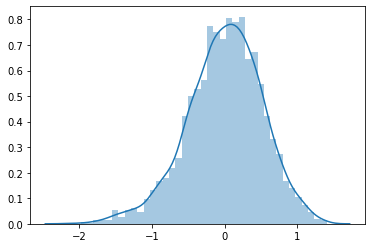

In [67]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm2.resid)
plt.show()

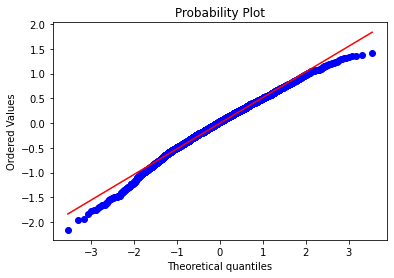

In [68]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats

import pylab

stats.probplot(lm2.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

In [69]:
# assumption: mean of residuals/errors is zero
print(lm2.resid.mean())

-4.109728430583865e-15


In [70]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lm2.resid, train.ln_total_spend))

(0.8087837247649058, 0.0)


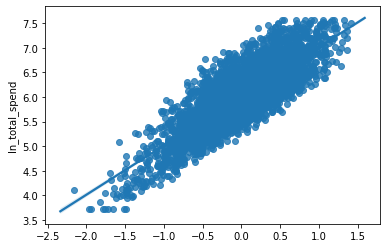

In [71]:
# assumption: homoscedasticity of residuals/errors

sns.regplot(x=lm2.resid, y=train.ln_total_spend)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()

### Removing Influential observations 

In [72]:
infl = lm2.get_influence()

In [73]:
sm_fr = infl.summary_frame()

In [109]:
sm_fr.to_csv("influential_observation.csv")

In [74]:
train.cooks_distance = sm_fr.cooks_d

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [75]:
train1=train.loc[train.cooks_distance<(4/train.shape[0]),['ln_total_spend','total_spend','agecat_5','agecat_6','card2_2','card2_3','card2_4','card2_5','card2benefit_3','card_2','card_3','card_4','card_5',
'cars_1','gender_1','hourstv','inccat_2','inccat_3','inccat_4','inccat_5','othdebt','owncd_1','reason_2','reason_4']]

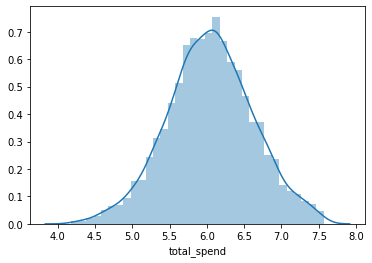

In [76]:
sns.distplot(np.log(train1.total_spend))

In [77]:
feature_3 =['agecat_5','agecat_6','card2_2','card2_3','card2_4','card2_5','card2benefit_3','card_2','card_3','card_4','card_5',
'cars_1','gender_1','hourstv','inccat_2','inccat_3','inccat_4','inccat_5','othdebt','owncd_1','reason_2','reason_4']

In [78]:
model_f = 'ln_total_spend ~'+'+'.join(feature_3)
model_f

'ln_total_spend ~agecat_5+agecat_6+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+cars_1+gender_1+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+othdebt+owncd_1+reason_2+reason_4'

In [79]:
model_f = '''ln_total_spend ~agecat_5+agecat_6+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+cars_1+gender_1+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+othdebt+owncd_1+reason_2+reason_4'''

In [80]:
lm3 = smf.ols(model_f , data = train1).fit()

In [81]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     94.96
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:06:14   Log-Likelihood:                -2059.6
No. Observations:                3319   AIC:                             4165.
Df Residuals:                    3296   BIC:                             4306.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5205      0.051    127.

In [110]:
train1.columns

Index(['ln_total_spend', 'total_spend', 'agecat_5', 'agecat_6', 'card2_2',
       'card2_3', 'card2_4', 'card2_5', 'card2benefit_3', 'card_2', 'card_3',
       'card_4', 'card_5', 'cars_1', 'gender_1', 'hourstv', 'inccat_2',
       'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'reason_2',
       'reason_4', 'pred_spend'],
      dtype='object')

In [82]:
# predict the sales on the training data
train1['pred_spend'] = np.exp(lm3.predict(train1))

In [83]:
#  predict the sales on the testing/validation data
test['pred_spend'] = np.exp(lm3.predict(test))

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
# accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = '%.3f' % np.mean(np.abs(train1.total_spend - train1.pred_spend)/train1.total_spend)
MAPE_test = '%.3f' % np.mean(np.abs(test.total_spend - test.pred_spend)/test.total_spend)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test) 

MAPE of training data:  0.395  |  MAPE of testing data:  0.521


In [85]:
#  accuracy metrics (b. RMSE: Root Mean Squared Error)
RMSE_train = mean_squared_error(train1.total_spend ,train1.pred_spend).round(3)
RMSE_test = mean_squared_error(test.total_spend ,test.pred_spend).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  58071.972  |  RMSE of testing data:  69296.725


In [86]:
# accuracy metrics (c. Correlation)
Corr_train = stats.stats.pearsonr(train1.total_spend, train1.pred_spend)
Corr_test = stats.stats.pearsonr(test.total_spend, test.pred_spend)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.6280263138414586, 0.0)  |  Correlation of testing data:  (0.5464420280915621, 1.602360647915728e-117)


In [121]:
# accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train1['Deciles'] = pd.qcut(train1['pred_spend'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_spend'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train1[['Deciles', 'pred_spend']].groupby(train1.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = train1[['Deciles', 'total_spend']].groupby(train1.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = test[['Deciles', 'total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')
Decile_analysis_test

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Deciles,pred_spend,total_spend
0,9,826.099706,855.494823
1,8,622.235320,636.371228
2,7,535.306378,572.094045
3,6,470.831137,541.683064
4,5,423.851624,471.681600
5,4,379.475045,426.912648
6,3,343.541459,365.909597
7,2,317.253742,361.328060
8,1,289.773773,323.509127
9,0,253.093465,279.177233


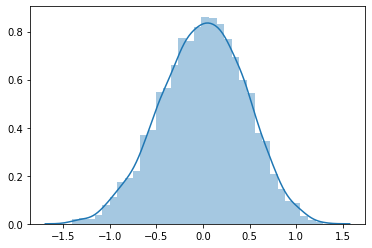

In [122]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm3.resid)
plt.show()

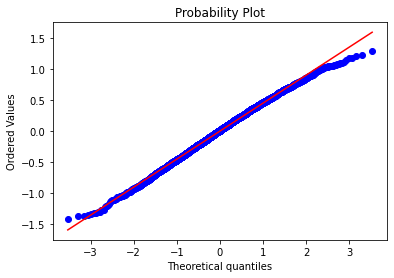

In [123]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats

import pylab

stats.probplot(lm3.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

In [124]:
# assumption: mean of residuals/errors is zero
print(lm3.resid.mean())

2.263664131438192e-15


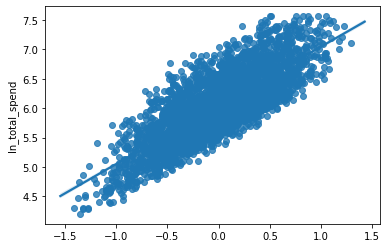

In [125]:
# assumption: homoscedasticity of residuals/errors

sns.regplot(x=lm3.resid, y=train1.ln_total_spend)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()

In [121]:
coef = pd.DataFrame(lm3.params).rename(columns = {0:'Coeficient'})
coef['Coeficient']= (coef.Coeficient*100).round(2)
coef['feature'] = coef.index
coef.reset_index(drop = True, inplace = True)
coef.to_csv("Coenficient.csv")

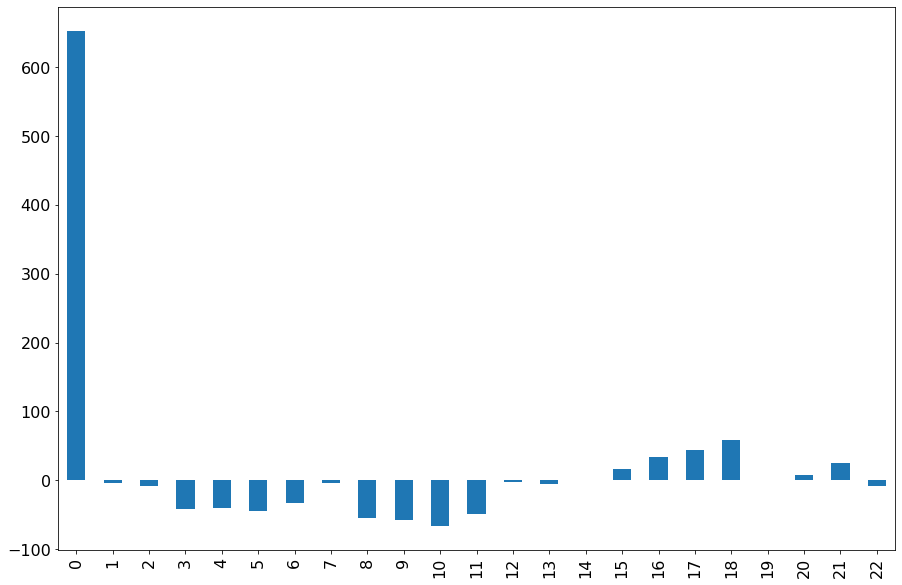

In [119]:
coef.Coeficient.plot(kind='bar',figsize=(15,10),fontsize=16)
plt.show()